In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Feel free to see accompanied PowerPoint slides for explanations.

## 1. Load data

In [2]:
df = pd.read_csv('adult_income.csv', skipinitialspace = True) # Reduce space as some data included spaces before and after
df.head()

Age        Work-class  fnlwgt  Education  Education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital-status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital-gain  Capital-loss  Hours-per-week Native-country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work-class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

### Check and remove duplicate rows

In [5]:
# Check duplicate records count
df.duplicated().sum() 

24

In [6]:
# Drop duplicated records
df['is_duplicate']= df.duplicated()
df = df[df.is_duplicate.isin([False])]
df.drop(['is_duplicate'], axis=1, inplace=True)
df.shape

# df[df.is_duplicate.isin([True])].sort_values(by=['Age'])

(32537, 15)

### Check missing values

In [7]:
# Check number of NaN values in each column
for column in df.columns:
    if df[column].isnull().any(): #if any NaN in the column
        print(f"{column}",df[column].isnull().sum())    #print the column name then the sum of number of NaN values

No missing values.

## 2. Exploratory Data Analysis

In [8]:
# Viewing each column's possible values and the count of each value
df_cat = df.select_dtypes(include="object")
for column in df_cat.columns:
    print(df_cat[column].value_counts(dropna=False)) # print the unique values and their frequency of appearing
    print('-'*30)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Work-class, dtype: int64
------------------------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: Education, dtype: int64
------------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital-status, dtype: int64
------------------------------
Prof-spe

In [9]:
#<=50K -> 0, >50k -> 1
df['Income'] = df['Income'].apply(lambda x: 0 if x=='<=50K' else 1)
df['Income'].value_counts(dropna=False)

0    24698
1     7839
Name: Income, dtype: int64

<AxesSubplot:ylabel='Sex'>

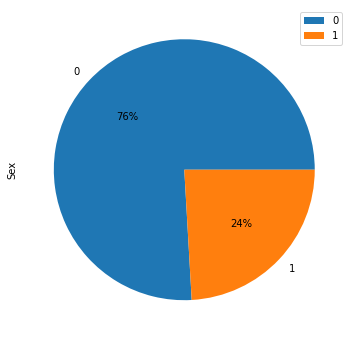

In [10]:
df.groupby(['Income']).count().plot(kind='pie', y='Sex', autopct='%1.0f%%', figsize=(8,6))

In [11]:
# define df_num and df_cat for numerical columns and object columns
df_num = df.select_dtypes(exclude="object") 
df_cat = df.select_dtypes(include="object")
print(f'Numerical variables: {len(df_num.columns)}')
print(f'Categorical variables: {len(df_cat.columns)}')

Numerical variables: 7
Categorical variables: 8


### 2.1 Numerical features - univariate analysis

In [12]:
cols = df_num.columns.tolist()
cols.remove('Income')
cols

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week']

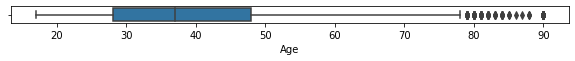

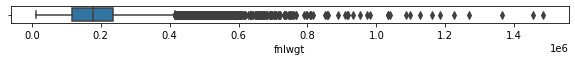

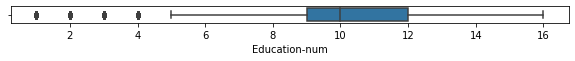

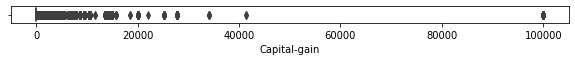

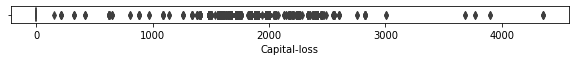

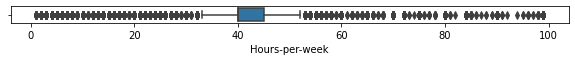

In [13]:
# Plot all numerical features in box plots - horizontal
for i in cols:
    plt.figure(figsize=(10,0.3))
    sns.boxplot(x=i, data=df_num)

plt.show()

In [14]:
# all data
df.describe().T

count           mean            std      min       25%  \
Age             32537.0      38.585549      13.637984     17.0      28.0   
fnlwgt          32537.0  189780.848511  105556.471009  12285.0  117827.0   
Education-num   32537.0      10.081815       2.571633      1.0       9.0   
Capital-gain    32537.0    1078.443741    7387.957424      0.0       0.0   
Capital-loss    32537.0      87.368227     403.101833      0.0       0.0   
Hours-per-week  32537.0      40.440329      12.346889      1.0      40.0   
Income          32537.0       0.240926       0.427652      0.0       0.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
fnlwgt          178356.0  236993.0  1484705.0  
Education-num       10.0      12.0       16.0  
Capital-gain         0.0       0.0    99999.0  
Capital-loss         0.0       0.0     4356.0  
Hours-per-week      40.0      45.0       99.0  
Income               0.0       0.0        1.0

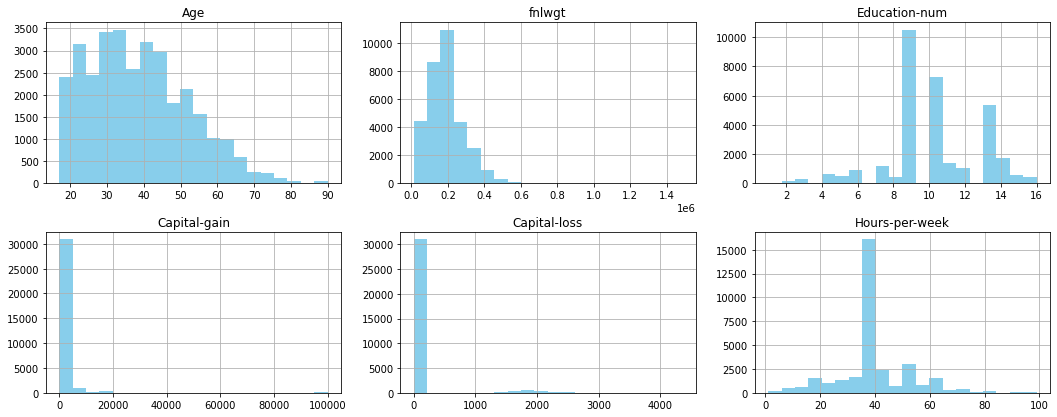

In [15]:
# Plot histogram
fig = plt.figure(figsize = (18, 80))
for i, variable in enumerate(cols):
    fig.add_subplot(21, 3, i+1)
    upper_limit = df_num[variable]#.quantile(0.99) #set a upper limit to 99th percentile for better plot display
    dfa = df_num[(df_num[variable] <= upper_limit)]
    dfa.iloc[:, i].hist(bins=20,color='skyblue',alpha=0.99)
    plt.subplots_adjust(hspace=0.3)
    plt.title(variable)
plt.show()

### 2.2 Numerical features - bivariate analysis with income

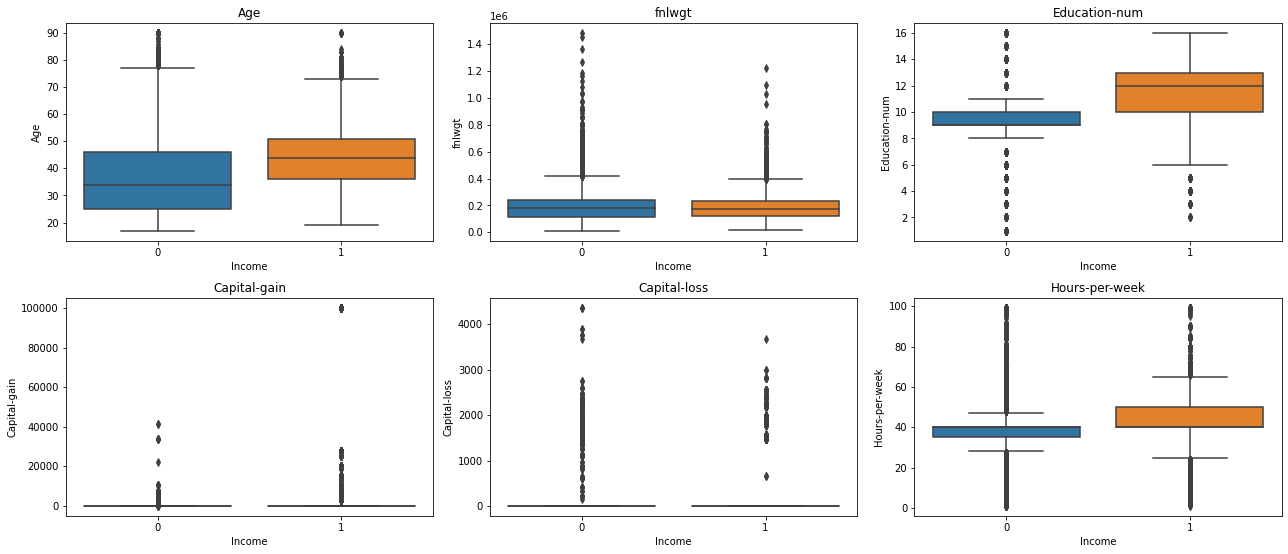

In [16]:
# Plot all numerical features in box plots against target variable
plt.figure(figsize=(18,80))

for i, variable in enumerate(cols):
                    upper_limit = df_num[variable]#.quantile(0.99) #set a upper limit to 99th percentile for better plot display
                    dfa = df_num[(df_num[variable] <= upper_limit)]
                    plt.subplot(21,3,i+1)
                    sns.boxplot(x="Income",y=dfa[variable], data=dfa)
                    plt.tight_layout()
                    plt.title(variable)
plt.show()

In [17]:
# income = <=50K
dfincome0 = df.loc[(df.Income == 0)]
dfincome0.describe().T

count           mean            std      min       25%  \
Age             24698.0      36.787392      14.017335     17.0      25.0   
fnlwgt          24698.0  190345.926796  106487.413197  12285.0  117606.0   
Education-num   24698.0       9.596081       2.434654      1.0       9.0   
Capital-gain    24698.0     148.884970     963.557955      0.0       0.0   
Capital-loss    24698.0      53.190258     310.890099      0.0       0.0   
Hours-per-week  24698.0      38.842862      12.318286      1.0      35.0   
Income          24698.0       0.000000       0.000000      0.0       0.0   

                     50%        75%        max  
Age                 34.0      46.00       90.0  
fnlwgt          179465.0  238968.25  1484705.0  
Education-num        9.0      10.00       16.0  
Capital-gain         0.0       0.00    41310.0  
Capital-loss         0.0       0.00     4356.0  
Hours-per-week      40.0      40.00       99.0  
Income               0.0       0.00        0.0

In [18]:
# income = >50K
dfincome1 = df.loc[(df.Income == 1)]
dfincome1.describe().T

count           mean            std      min       25%  \
Age             7839.0      44.250925      10.520102     19.0      36.0   
fnlwgt          7839.0  188000.480674  102554.464101  14878.0  119100.0   
Education-num   7839.0      11.612195       2.385181      2.0      10.0   
Capital-gain    7839.0    4007.164562   14572.097223      0.0       0.0   
Capital-loss    7839.0     195.051282     595.555395      0.0       0.0   
Hours-per-week  7839.0      45.473402      11.014165      1.0      40.0   
Income          7839.0       1.000000       0.000000      1.0       1.0   

                     50%       75%        max  
Age                 44.0      51.0       90.0  
fnlwgt          176063.0  230969.0  1226583.0  
Education-num       12.0      13.0       16.0  
Capital-gain         0.0       0.0    99999.0  
Capital-loss         0.0       0.0     3683.0  
Hours-per-week      40.0      50.0       99.0  
Income               1.0       1.0        1.0

### 2.3 Numerical features - multivariate analysis

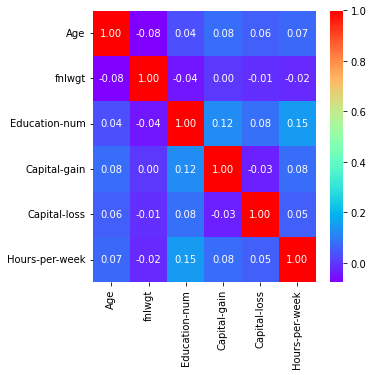

In [19]:
# Corr matrix
df_selected_num = df[cols]

plt.figure(figsize=(5,5))
sns.heatmap(df_selected_num.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

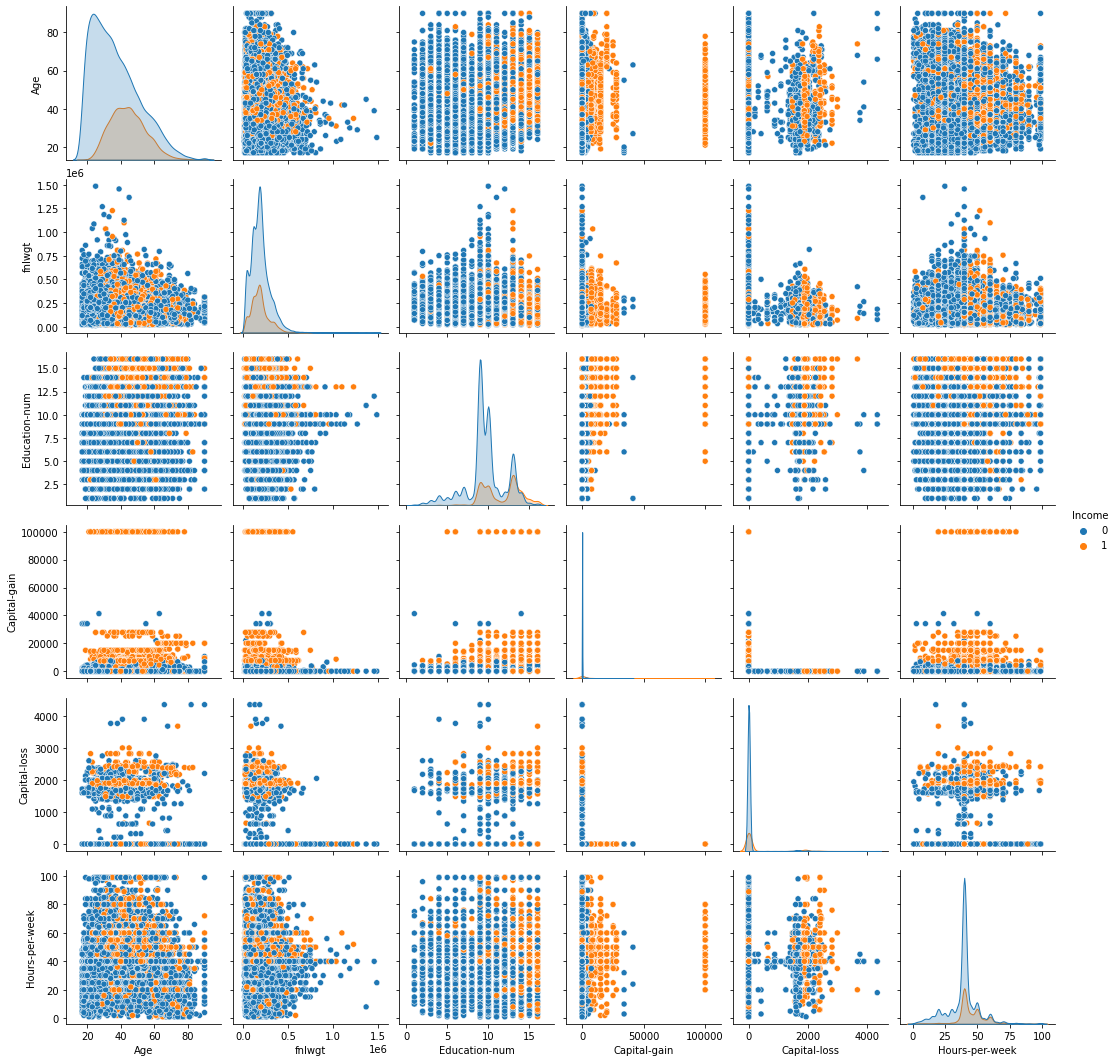

In [20]:
# Pairplots
sns.pairplot(data=df_num, hue="Income", palette="tab10")

### 2.4 Categorical features - univariate analysis

In [21]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Work-class      32537 non-null  object
 1   Education       32537 non-null  object
 2   Marital-status  32537 non-null  object
 3   Occupation      32537 non-null  object
 4   Relationship    32537 non-null  object
 5   Race            32537 non-null  object
 6   Sex             32537 non-null  object
 7   Native-country  32537 non-null  object
dtypes: object(8)
memory usage: 3.2+ MB


In [22]:
# Function to plot bar chart:
def bar_chart(x):
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=x, data=df1, palette='nipy_spectral_r', order=sorted(list(dict.fromkeys(x.tolist())))) #sort xlabel in ascending order to match with stacked bar chart
    plt.ylabel("count", fontsize = 12)
    plt. xticks (rotation= 90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


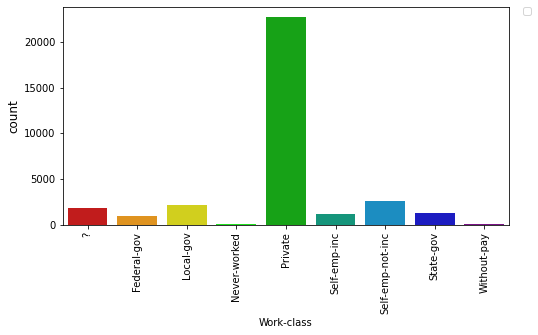

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


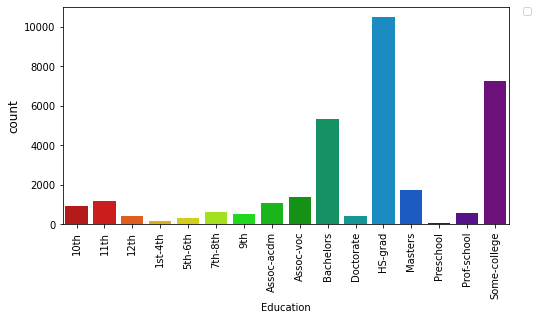

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


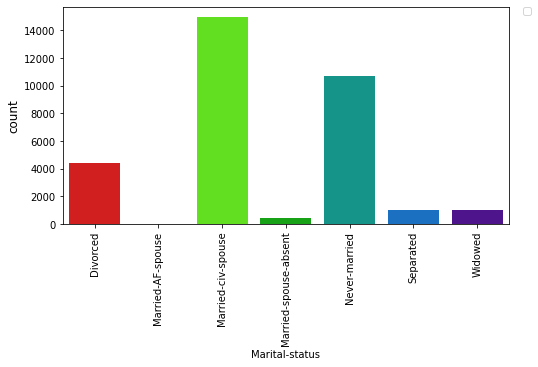

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


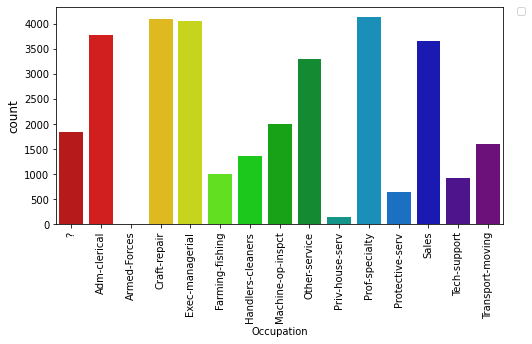

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


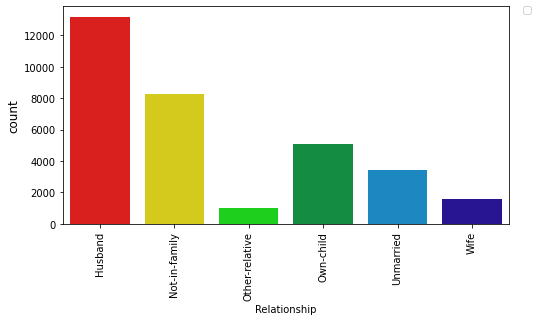

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


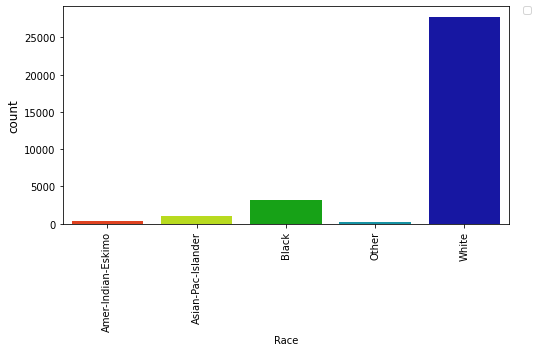

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


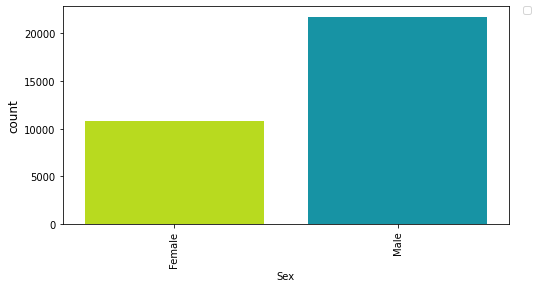

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


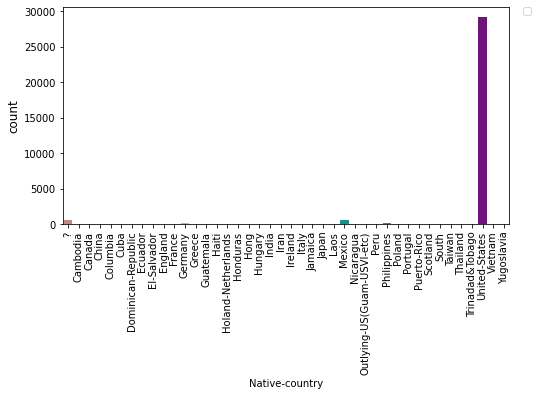

In [23]:
col = df_cat.columns.tolist()
for c in col:
    df1=df.dropna(subset=[c], axis=0) #need this line for the 'order=sorted' to work - otherwise some nan would come up and prevent sorting
    bar_chart(df1[c])

### 2.5 Categorical features - bivariate analysis with income

In [24]:
# Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Income'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,df['Income'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,4))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Income                0     1    All
Work-class                          
?                  1645   191   1836
Federal-gov         589   371    960
Local-gov          1476   617   2093
Never-worked          7     0      7
Private           17712  4961  22673
Self-emp-inc        494   622   1116
Self-emp-not-inc   1816   724   2540
State-gov           945   353   1298
Without-pay          14     0     14
All               24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


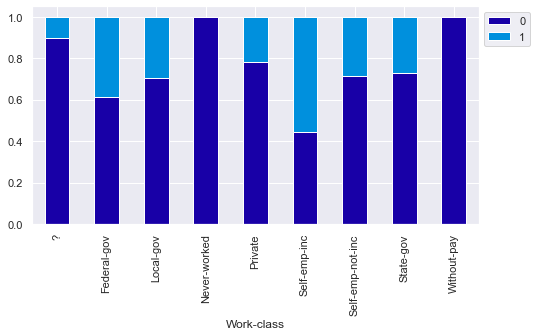

Income            0     1    All
Education                       
10th            871    62    933
11th           1115    60   1175
12th            400    33    433
1st-4th         160     6    166
5th-6th         316    16    332
7th-8th         605    40    645
9th             487    27    514
Assoc-acdm      802   265   1067
Assoc-voc      1021   361   1382
Bachelors      3132  2221   5353
Doctorate       107   306    413
HS-grad        8820  1674  10494
Masters         763   959   1722
Preschool        50     0     50
Prof-school     153   423    576
Some-college   5896  1386   7282
All           24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


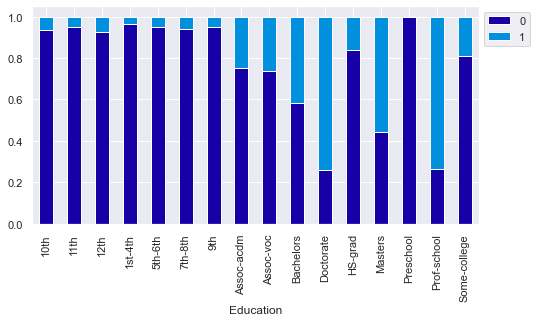

Income                     0     1    All
Marital-status                           
Divorced                3978   463   4441
Married-AF-spouse         13    10     23
Married-civ-spouse      8280  6690  14970
Married-spouse-absent    384    34    418
Never-married          10176   491  10667
Separated                959    66   1025
Widowed                  908    85    993
All                    24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


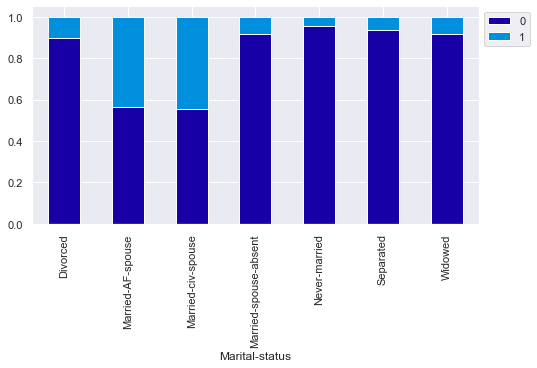

Income                 0     1    All
Occupation                           
?                   1652   191   1843
Adm-clerical        3261   507   3768
Armed-Forces           8     1      9
Craft-repair        3165   929   4094
Exec-managerial     2097  1968   4065
Farming-fishing      877   115    992
Handlers-cleaners   1283    86   1369
Machine-op-inspct   1751   249   2000
Other-service       3154   137   3291
Priv-house-serv      146     1    147
Prof-specialty      2278  1858   4136
Protective-serv      438   211    649
Sales               2667   983   3650
Tech-support         644   283    927
Transport-moving    1277   320   1597
All                24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


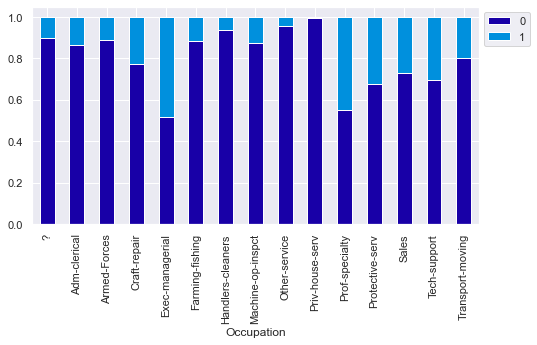

Income              0     1    All
Relationship                      
Husband          7271  5916  13187
Not-in-family    7436   856   8292
Other-relative    944    37    981
Own-child        4997    67   5064
Unmarried        3227   218   3445
Wife              823   745   1568
All             24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


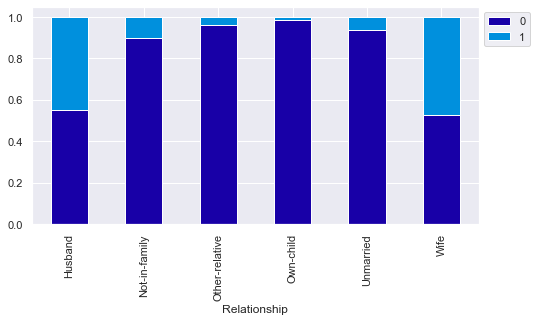

Income                  0     1    All
Race                                  
Amer-Indian-Eskimo    275    36    311
Asian-Pac-Islander    762   276   1038
Black                2735   387   3122
Other                 246    25    271
White               20680  7115  27795
All                 24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


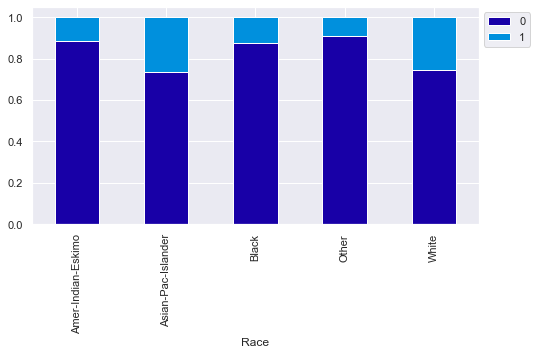

Income      0     1    All
Sex                       
Female   9583  1179  10762
Male    15115  6660  21775
All     24698  7839  32537
------------------------------------------------------------------------------------------------------------------------


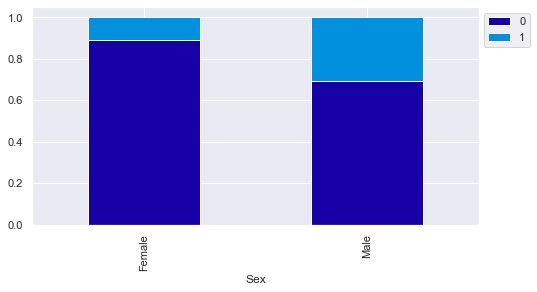

Income                          0     1    All
Native-country                                
?                             436   146    582
Cambodia                       12     7     19
Canada                         82    39    121
China                          55    20     75
Columbia                       57     2     59
Cuba                           70    25     95
Dominican-Republic             68     2     70
Ecuador                        24     4     28
El-Salvador                    97     9    106
England                        60    30     90
France                         17    12     29
Germany                        93    44    137
Greece                         21     8     29
Guatemala                      59     3     62
Haiti                          40     4     44
Holand-Netherlands              1     0      1
Honduras                       12     1     13
Hong                           14     6     20
Hungary                        10     3     13
India        

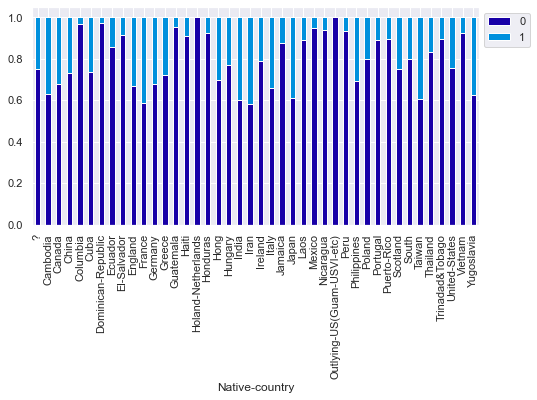

In [25]:
col = df_cat.columns.tolist()
for c in col:
    stacked_plot(df[c])

#### Plot education in ascending edu level order for better display

In [26]:
edu_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 
             'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


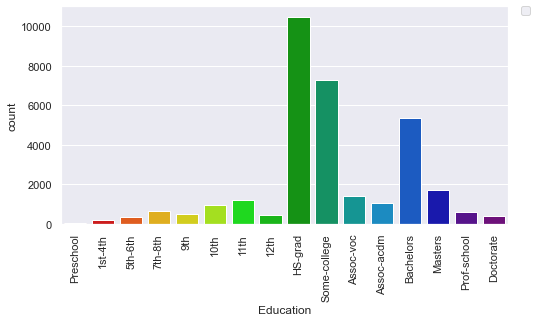

In [27]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Education', data=df, palette='nipy_spectral_r', order=edu_order)
plt.ylabel("count", fontsize = 12)
plt. xticks (rotation= 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
plt.show()

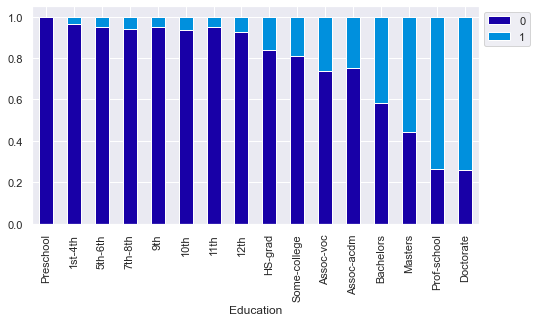

In [28]:
sns.set(palette='nipy_spectral')
tab = pd.crosstab(df['Education'],df['Income'],normalize='index').loc[edu_order]
tab.plot(kind='bar',stacked=True,figsize=(8,4))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### 2.6 Other bivariate analysis

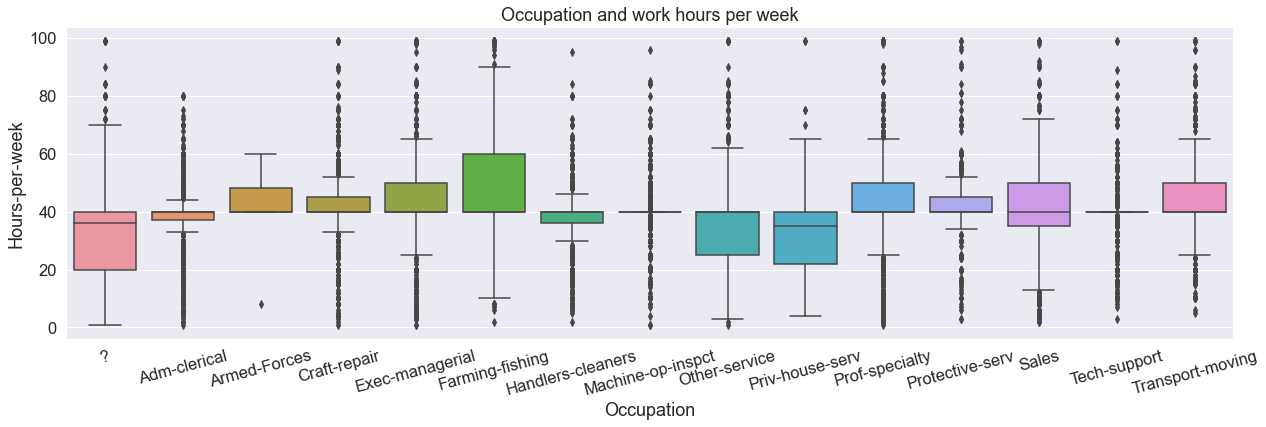

In [29]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Occupation', y=df['Hours-per-week'], data=df, order=sorted(list(dict.fromkeys(df['Occupation'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Occupation and work hours per week')
plt.show()

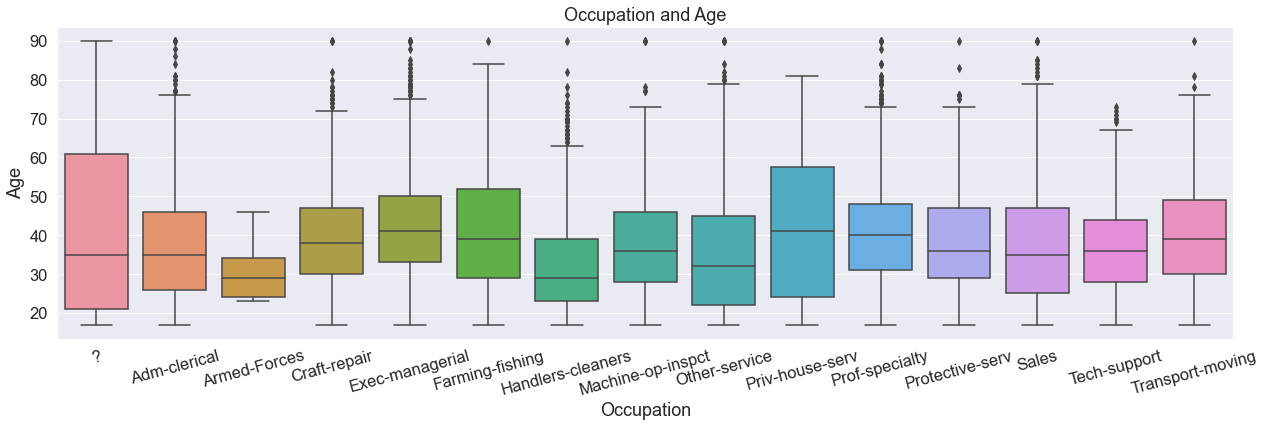

In [30]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Occupation', y=df['Age'], data=df, order=sorted(list(dict.fromkeys(df['Occupation'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Occupation and Age')
plt.show()

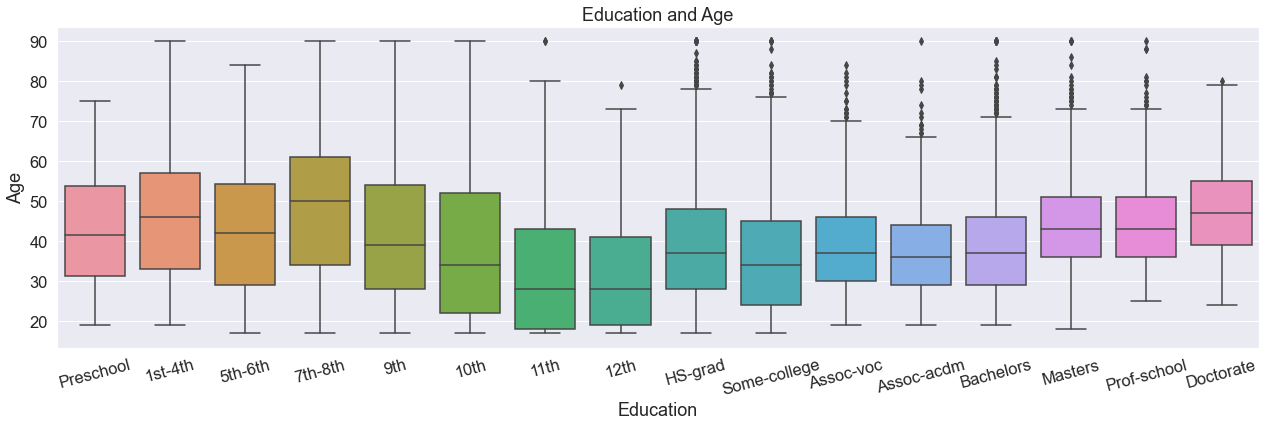

In [31]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Education', y=df['Age'], data=df, order=edu_order)
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Education and Age')
plt.show()

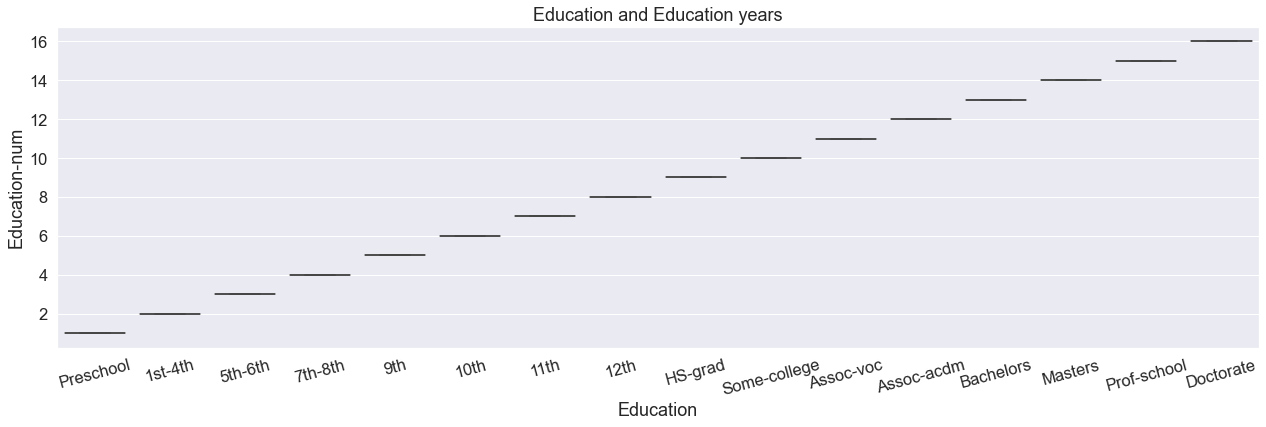

In [32]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Education',y=df['Education-num'], data=df, order=edu_order)
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Education and Education years')
plt.show()

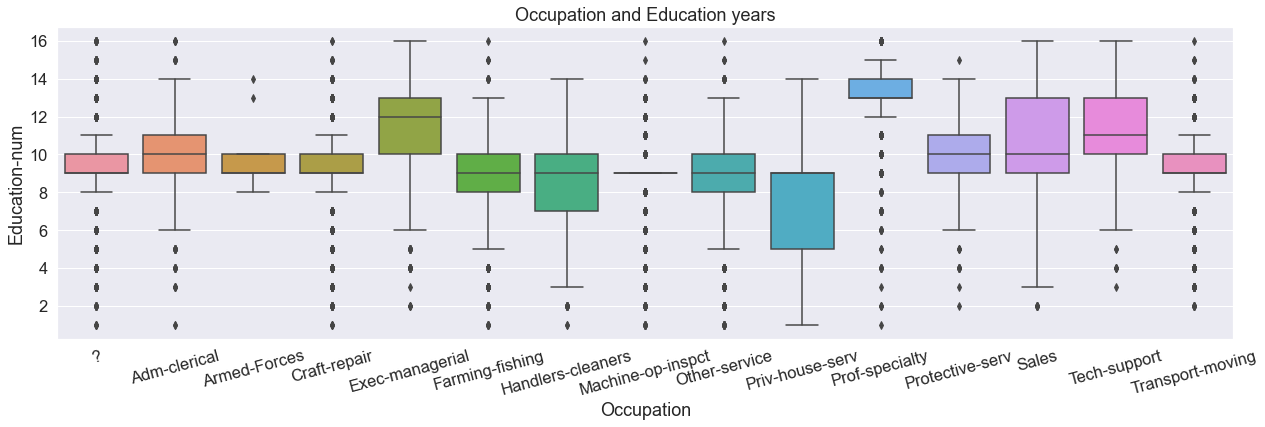

In [33]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Occupation',y=df['Education-num'], data=df, order=sorted(list(dict.fromkeys(df['Occupation'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Occupation and Education years')
plt.show()

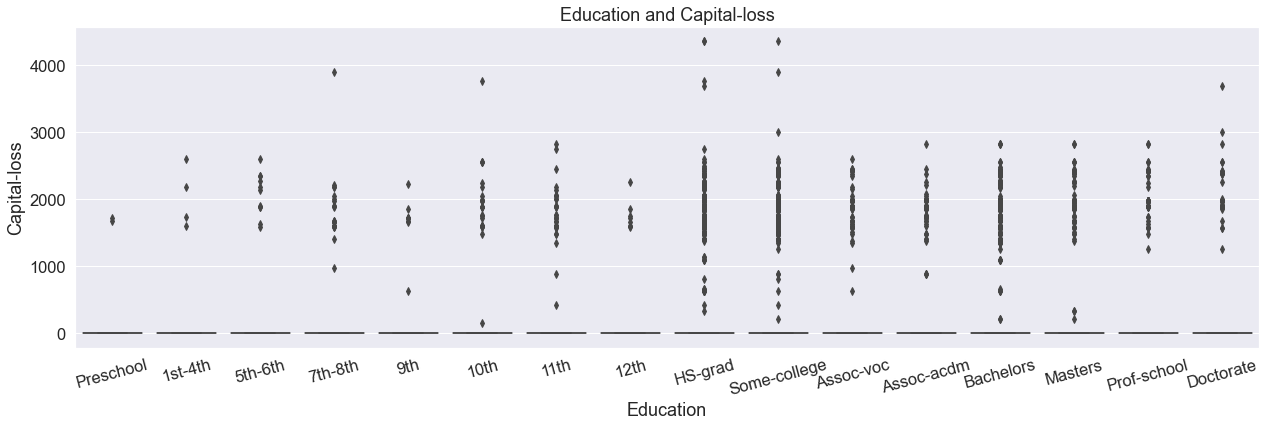

In [34]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Education',y=df['Capital-loss'], data=df, order=edu_order)
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Education and Capital-loss')
plt.show()

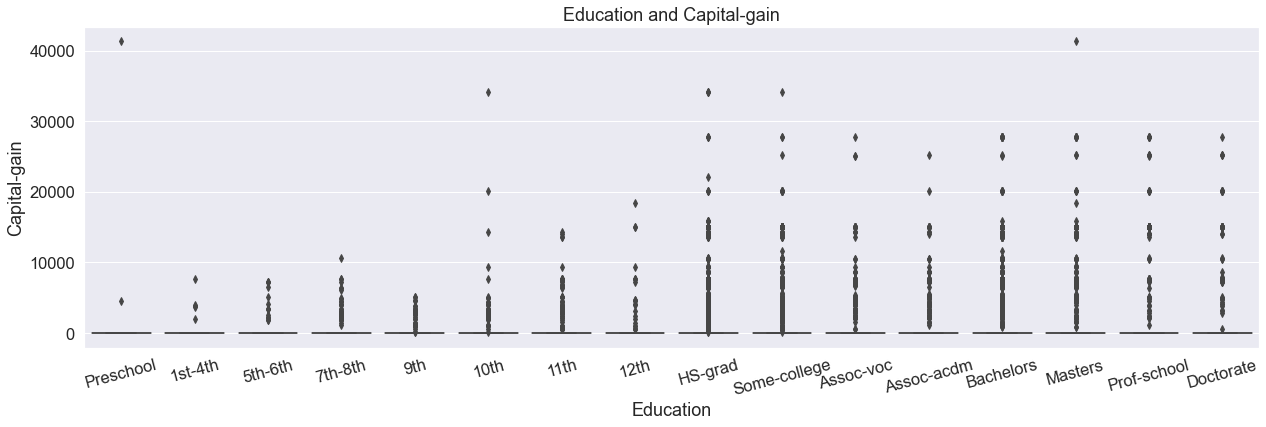

In [35]:
df_exclu_99999 = df.loc[~df['Capital-gain'].isin([99999])]
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Education',y=df_exclu_99999['Capital-gain'], data=df_exclu_99999, order=edu_order)
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Education and Capital-gain')
plt.show()

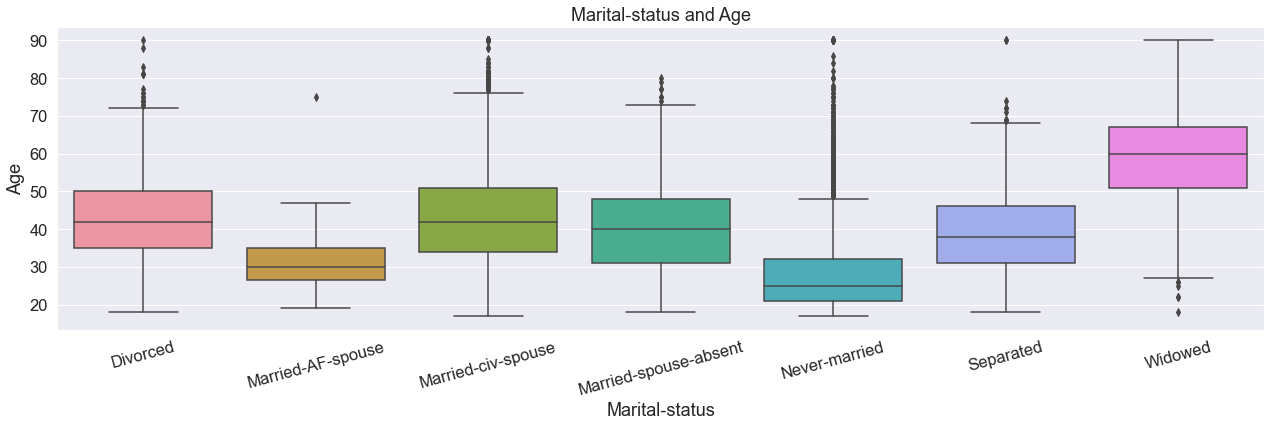

In [36]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Marital-status',y=df['Age'], data=df, order=sorted(list(dict.fromkeys(df['Marital-status'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Marital-status and Age')
plt.show()

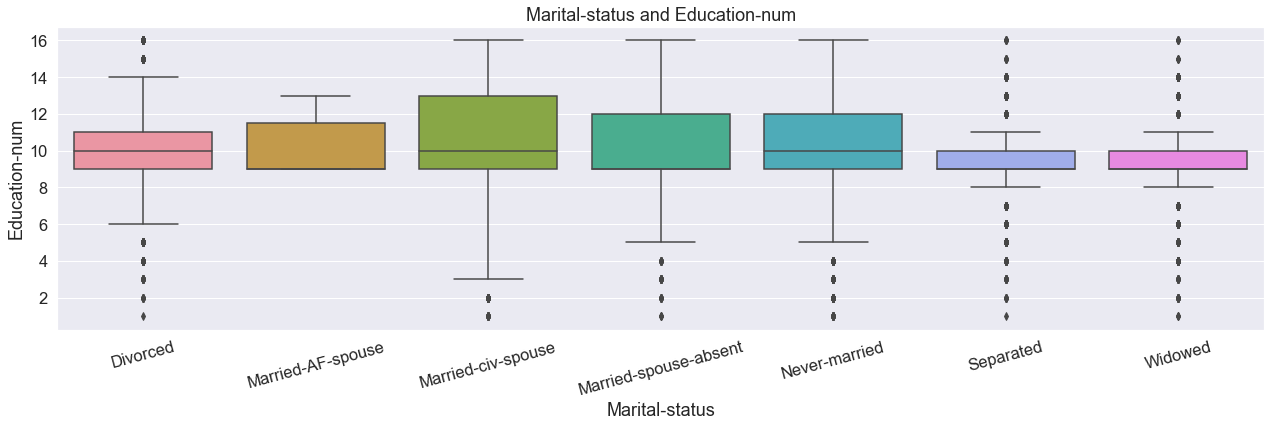

In [37]:
plt.figure(figsize=(18,6))
sns.set(palette='nipy_spectral', font_scale=1.5)
sns.boxplot(x='Marital-status',y=df['Education-num'], data=df, order=sorted(list(dict.fromkeys(df['Marital-status'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Marital-status and Education-num')
plt.show()

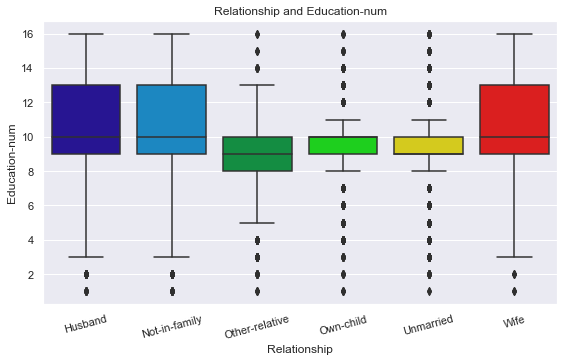

In [38]:
plt.figure(figsize=(8,5))
sns.set(palette='nipy_spectral', font_scale=1)
sns.boxplot(x='Relationship',y=df['Education-num'], data=df, order=sorted(list(dict.fromkeys(df['Relationship'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Relationship and Education-num')
plt.show()

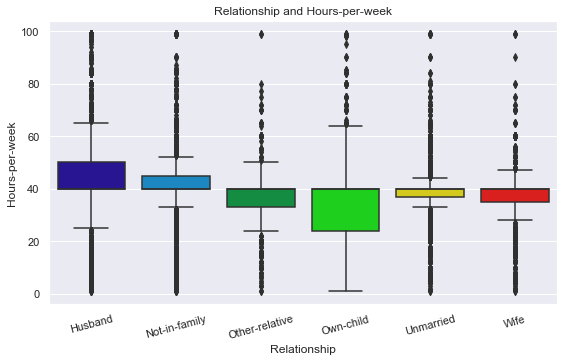

In [39]:
plt.figure(figsize=(8,5))
sns.set(palette='nipy_spectral', font_scale=1)
sns.boxplot(x='Relationship',y=df['Hours-per-week'], data=df, order=sorted(list(dict.fromkeys(df['Relationship'].tolist()))))
plt. xticks (rotation= 15)
plt.tight_layout()
plt.title('Relationship and Hours-per-week')
plt.show()

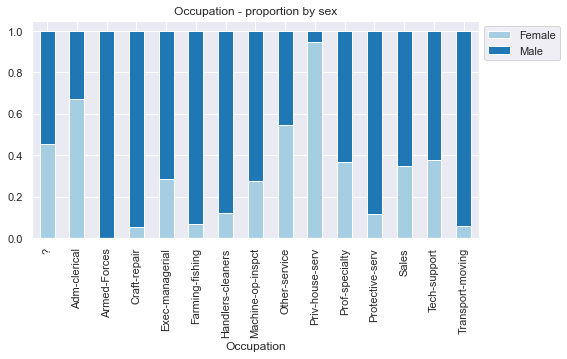

In [40]:
sns.set(palette='Paired')
tab = pd.crosstab(df['Occupation'],df['Sex'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(8,4))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title('Occupation - proportion by sex')
plt.show()

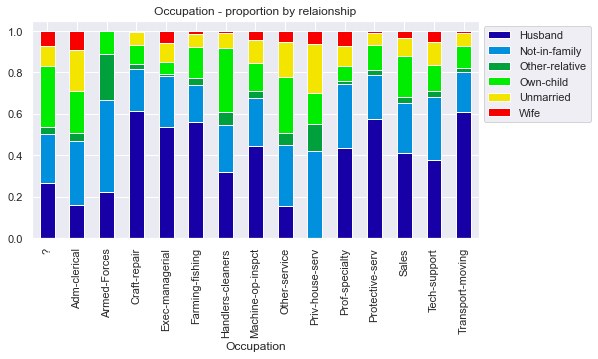

In [41]:
sns.set(palette='nipy_spectral')
tab = pd.crosstab(df['Occupation'],df['Relationship'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(8,4))
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.title('Occupation - proportion by relaionship')
plt.show()

## 3. Data pre-processing and feature engineering

### 3.1 Drop features

In [42]:
# Drop features
df.drop(['fnlwgt'], axis=1, inplace=True)


### 3.2 Treat outliers

In [43]:
cols.remove('fnlwgt')
cols

['Age', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']

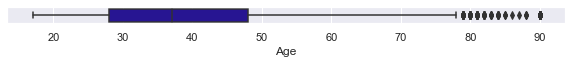

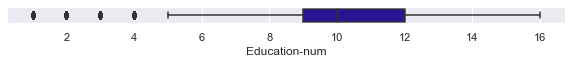

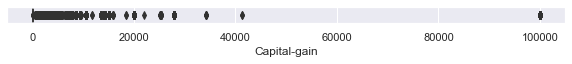

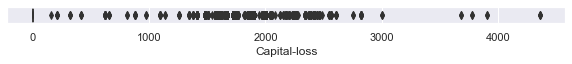

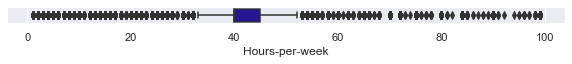

In [44]:
# Plot all numerical features in box plots - horizontal
for i in cols:
    plt.figure(figsize=(10,0.3))
    sns.boxplot(x=i, data=df)

plt.show()

In [45]:
# Replace 99999 in capital with 0
df['Capital-gain'].replace(99999,0,inplace=True)

<AxesSubplot:xlabel='Capital-gain'>

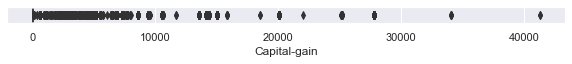

In [46]:
# Plot
plt.figure(figsize=(10,0.3))
sns.boxplot(x='Capital-gain', data=df)

### 3.3 Standardization

In [47]:
# import scaler
from sklearn.preprocessing import StandardScaler

#list for cols to scale
cols_to_scale = ['Capital-gain', 'Capital-loss']

#create and fit scaler
ss = StandardScaler()
ss.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = ss.transform(df[cols_to_scale])

# view updated feature set
df.head()

Age        Work-class  Education  Education-num      Marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Capital-gain  \
0       Adm-clerical  Not-in-family  White    Male      0.620004   
1    Exec-managerial        Husband  White    Male     -0.230815   
2  Handlers-cleaners  Not-in-family  White    Male     -0.230815   
3  Handlers-cleaners        Husband  Black    Male     -0.230815   
4     Prof-specialty           Wife  Black  Female     -0.230815   

   Capital-loss  Hours-per-week Native-country  Income  
0     -0.216743              40  United-States       0  
1     -0.216743              13  United-States       0  
2     -0.216743              40  United-States       0  
3     -0.216743              40  United-States       0  
4     -0.216743              40           Cuba       0

### 3.4 One-hot encoding

In [48]:
# Count and list number of unique values in specific column
df['Education'].value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: Education, dtype: int64

In [49]:
df['Education'].replace(['Preschool','1st-4th','5th-6th', '7th-8th', '9th', '10th', '11th', '12th'],'12th or below',inplace=True)
df['Education'].replace(['Assoc-voc', 'Assoc-acdm'],'Assoc voc or acdm',inplace=True)
df['Education'].value_counts(dropna=False)

HS-grad              10494
Some-college          7282
Bachelors             5353
12th or below         4248
Assoc voc or acdm     2449
Masters               1722
Prof-school            576
Doctorate              413
Name: Education, dtype: int64

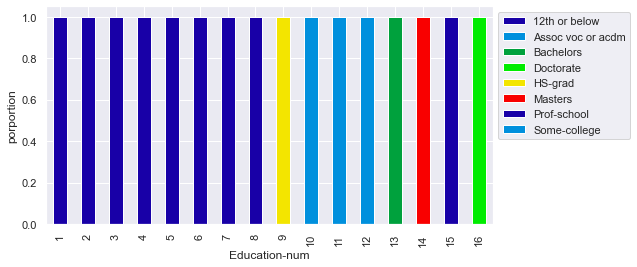

In [50]:
# Plot education num in category and hue=Education
sns.set(palette='nipy_spectral')
tab1 = pd.crosstab(df['Education-num'],df['Education'],margins=True)
tab = pd.crosstab(df['Education-num'],df['Education'],normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(8,4))
plt.ylabel("porportion", fontsize = 12)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observation:**
- Noted from this graph and the box plot in previous section, education-num actually highly correlates with education (i.e. number of years education ~ degree level) - makes sense.

- Considering this very high correlation between these two numerical and categorical features, we can drop one of the them. Here we will drop education and retain education-num.

In [51]:
df.drop(['Education'], axis=1, inplace=True)

In [52]:
df['Occupation'].replace(['?', 'Armed-Forces','Priv-house-serv'],'Others',inplace=True)
df['Occupation'].value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Others               1999
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Name: Occupation, dtype: int64

In [53]:
df['Work-class'].replace(['?', 'Never-worked','Without-pay'],'Others',inplace=True)
df['Work-class'].replace(['Local-gov', 'State-gov'], 'Local or State gov', inplace=True)
df['Work-class'].value_counts(dropna=False)

Private               22673
Local or State gov     3391
Self-emp-not-inc       2540
Others                 1857
Self-emp-inc           1116
Federal-gov             960
Name: Work-class, dtype: int64

In [54]:
df['Marital-status'].replace(['Married-AF-spouse', 'Married-spouse-absent', 'separated', 'Widowed'],'Others',inplace=True)
df['Marital-status'].value_counts(dropna=False)

Married-civ-spouse    14970
Never-married         10667
Divorced               4441
Others                 1434
Separated              1025
Name: Marital-status, dtype: int64

In [55]:
country = ['United-States']
df.loc[~df['Native-country'].isin(country), 'Native-country']  = 'Others'
df['Native-country'].value_counts(dropna=False)

United-States    29153
Others            3384
Name: Native-country, dtype: int64

In [56]:
df['Race'].replace(['Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],'Others',inplace=True)
df['Race'].value_counts(dropna=False)

White     27795
Black      3122
Others     1620
Name: Race, dtype: int64

In [57]:
c = df_cat.columns.to_list()
c.remove('Education')
c

['Work-class',
 'Marital-status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-country']

In [58]:
#one-hot encoding
df = pd.get_dummies(df, columns = c)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                32537 non-null  int64  
 1   Education-num                      32537 non-null  int64  
 2   Capital-gain                       32537 non-null  float64
 3   Capital-loss                       32537 non-null  float64
 4   Hours-per-week                     32537 non-null  int64  
 5   Income                             32537 non-null  int64  
 6   Work-class_Federal-gov             32537 non-null  uint8  
 7   Work-class_Local or State gov      32537 non-null  uint8  
 8   Work-class_Others                  32537 non-null  uint8  
 9   Work-class_Private                 32537 non-null  uint8  
 10  Work-class_Self-emp-inc            32537 non-null  uint8  
 11  Work-class_Self-emp-not-inc        32537 non-null  uin

### 3.5 Handling imbalanced dataset

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report

In [61]:
from sklearn.model_selection import train_test_split
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

# Apply the random under-sampling
rus = RandomUnderSampler(random_state = 0)
X_RUS, y_RUS = rus.fit_resample(X_train, y_train)

# Apply the random over-sampling
ros = RandomOverSampler(random_state = 0)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)

# Apply regular SMOTE
sm = SMOTE(random_state = 0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
print('without dealing with imbalanced dataset:')
LR = LogisticRegression(max_iter=5000)
LR.fit(X_train, y_train)

print(classification_report(y_test, LR.predict(X_test)))

LR_proba = LR.predict_proba(X_test)
tpr, fpr, _ = roc_curve(y_test, LR_proba[:, 1])
print('test auc:', auc(tpr, fpr))

without dealing with imbalanced dataset:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7410
           1       0.73      0.60      0.66      2352

    accuracy                           0.85      9762
   macro avg       0.80      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762

test auc: 0.9041771668181442


In [65]:
print('with class_weight = "balanced":')
LR_weight = LogisticRegression(class_weight = 'balanced', max_iter=5000)
LR_weight.fit(X_train, y_train)

print(classification_report(y_test, LR_weight.predict(X_test)))

LR_weight_proba = LR_weight.predict_proba(X_test)
tpr, fpr, _ = roc_curve(y_test, LR_weight_proba[:, 1])
print('test auc:', auc(tpr, fpr))

with class_weight = "balanced":
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7410
           1       0.56      0.85      0.68      2352

    accuracy                           0.80      9762
   macro avg       0.75      0.82      0.77      9762
weighted avg       0.85      0.80      0.82      9762

test auc: 0.9041149118216787


In [66]:
print('SMOTE:')
LR_SMOTE = LogisticRegression(max_iter=5000)
LR_SMOTE.fit(X_SMOTE, y_SMOTE)

print(classification_report(y_test, LR_SMOTE.predict(X_test)))

LR_SMOTE_proba = LR_SMOTE.predict_proba(X_test)
tpr, fpr, _ = roc_curve(y_test, LR_SMOTE_proba[:, 1])
print('test auc:', auc(tpr, fpr))

SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7410
           1       0.65      0.70      0.67      2352

    accuracy                           0.84      9762
   macro avg       0.78      0.79      0.78      9762
weighted avg       0.84      0.84      0.84      9762

test auc: 0.9012615100021115


In [67]:
print('ROS:')
LR_ROS = LogisticRegression(max_iter=5000)
LR_ROS.fit(X_ROS, y_ROS)

print(classification_report(y_test, LR_ROS.predict(X_test)))

LR_ROS_proba = LR_ROS.predict_proba(X_test)
tpr, fpr, _ = roc_curve(y_test, LR_ROS_proba[:, 1])
print('test auc:', auc(tpr, fpr))

ROS:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7410
           1       0.56      0.84      0.67      2352

    accuracy                           0.80      9762
   macro avg       0.75      0.82      0.77      9762
weighted avg       0.85      0.80      0.81      9762

test auc: 0.904058222479275


In [68]:
print('RUS:')
LR_RUS = LogisticRegression(max_iter=5000)
LR_RUS.fit(X_RUS, y_RUS)

print(classification_report(y_test, LR_RUS.predict(X_test)))

LR_RUS_proba = LR_RUS.predict_proba(X_test)
tpr, fpr, _ = roc_curve(y_test, LR_RUS_proba[:, 1])
print('test auc:', auc(tpr, fpr))

RUS:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7410
           1       0.56      0.84      0.68      2352

    accuracy                           0.80      9762
   macro avg       0.75      0.82      0.77      9762
weighted avg       0.85      0.80      0.82      9762

test auc: 0.9038339897362453


## 4. Model Building

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

# Check class imbalance in set
print('Train subscribe class = {}'.format(sum(y_train == 1)))
print('Train non subscribe class = {}'.format(len(y_train) - sum(y_train == 1)))
print('Test subscribe class = {}'.format(sum(y_test == 1)))
print('Test non subscribe class = {}'.format(len(y_test) - sum(y_test == 1)))

Train subscribe class = 5487
Train non subscribe class = 17288
Test subscribe class = 2352
Test non subscribe class = 7410


In [70]:
def classificationreport_train(model):
    y_train_pred = model.predict(X_train)
    print(classification_report(y_train, y_train_pred))

In [71]:
def classificationreport_test(model):
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred))

In [72]:
def confusionmatrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
plt.show()

In [73]:
def plotroc(model):
    # Calculate class probabilities, generate ROC curve, and compute AUC
    y_proba=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    model_roc_auc = roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % model_roc_auc)

    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve',fontsize = "12")
    plt.legend(loc="lower right")
    plt.show()

### 4.1 Logistic Regression

In [74]:
%%time
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100]}
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, class_weight='balanced')
#skf = StratifiedKFold(n_splits = 5)

clf_cv = GridSearchCV(clf, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)
clf_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best CV parameters: {}".format(clf_cv.best_params_)) 
print("Best score: {}".format(clf_cv.best_score_))

Best CV parameters: {'C': 0.5}
Best score: 0.9046157665169584
Wall time: 35.7 s


In [75]:
# Set the clf to the best combination of parameters
lr_estimator = clf_cv.best_estimator_

# Fit the best algorithm to the data
lr_estimator.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=5000)

In [76]:
log_odds = lr_estimator.coef_[0]
pd.DataFrame(log_odds, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Relationship_Wife                  1.584052
Marital-status_Married-civ-spouse  1.276334
Capital-gain                       0.782277
Occupation_Exec-managerial         0.764020
Occupation_Protective-serv         0.745061
Occupation_Tech-support            0.714902
Occupation_Prof-specialty          0.681237
Work-class_Federal-gov             0.518242
Sex_Male                           0.389392
Education-num                      0.288723
Relationship_Husband               0.283599
Occupation_Sales                   0.277416
Capital-loss                       0.252702
Work-class_Self-emp-inc            0.233571
Occupation_Craft-repair            0.119831
Native-country_United-States       0.093775
Relationship_Not-in-family         0.074997
Occupation_Adm-clerical            0.062835
Hours-per-week                     0.034641
Age                                0.029890
Race_White                         0.022105
Race_Others                        0.018350
Work-class_Private                 0.007044
Marital-status_Others             -0.015018
Race_Black                        -0.065415
Relationship_Unmarried            -0.066938
Work-class_Others                 -0.070435
Native-country_Others             -0.118735
Occupation_Transport-moving       -0.152652
Marital-status_Divorced           -0.183313
Occupation_Machine-op-inspct      -0.219225
Work-class_Local or State gov     -0.354468
Work-class_Self-emp-not-inc       -0.358912
Sex_Female                        -0.414352
Marital-status_Separated          -0.435386
Occupation_Handlers-cleaners      -0.549602
Occupation_Others                 -0.628577
Marital-status_Never-married      -0.667577
Occupation_Other-service          -0.801371
Relationship_Other-relative       -0.880777
Relationship_Own-child            -1.019892
Occupation_Farming-fishing        -1.038833

Train score:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     17288
           1       0.57      0.85      0.68      5487

    accuracy                           0.81     22775
   macro avg       0.76      0.82      0.77     22775
weighted avg       0.85      0.81      0.82     22775

Test score:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7410
           1       0.56      0.84      0.67      2352

    accuracy                           0.80      9762
   macro avg       0.75      0.82      0.77      9762
weighted avg       0.85      0.80      0.82      9762



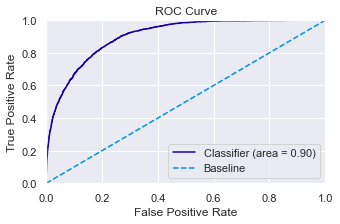

In [77]:
print('Train score:')
classificationreport_train(lr_estimator)
print('Test score:')
classificationreport_test(lr_estimator)
plotroc(lr_estimator)

### 4.2 Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [79]:
%%time
params = {'max_depth': [4,6,8,10,15],
          'criterion':['entropy', 'gini']}

clf_tree = DecisionTreeClassifier(class_weight='balanced', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None)

clf_tree_cv = GridSearchCV(estimator=clf_tree, param_grid=params, scoring='roc_auc', cv=5) 
clf_tree_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best cv parameters: {}".format(clf_tree_cv.best_params_)) 
print("Best score: {}".format(clf_tree_cv.best_score_))

Best cv parameters: {'criterion': 'entropy', 'max_depth': 8}
Best score: 0.8964554678536407
Wall time: 3.65 s


In [80]:
# Set the clf to the best combination of parameters
dtc = clf_tree_cv.best_estimator_

# Fit the best algorithm to the data 
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8)

Train score:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     17288
           1       0.57      0.88      0.69      5487

    accuracy                           0.81     22775
   macro avg       0.76      0.83      0.78     22775
weighted avg       0.86      0.81      0.82     22775

Test score:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      7410
           1       0.54      0.86      0.67      2352

    accuracy                           0.79      9762
   macro avg       0.75      0.82      0.76      9762
weighted avg       0.85      0.79      0.81      9762



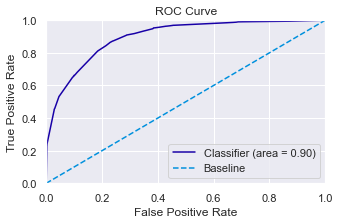

In [81]:
print('Train score:')
classificationreport_train(dtc)
print('Test score:')
classificationreport_test(dtc)
plotroc(dtc)

In [82]:
tree_rules = export_text(dtc, feature_names=list(X_train.columns))
print(tree_rules)

|--- Marital-status_Married-civ-spouse <= 0.50
|   |--- Capital-gain <= 2.54
|   |   |--- Education-num <= 12.50
|   |   |   |--- Age <= 28.50
|   |   |   |   |--- Hours-per-week <= 49.50
|   |   |   |   |   |--- Relationship_Husband <= 0.50
|   |   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  20.50
|   |   |   |   |   |   |   |--- Occupation_Protective-serv <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Occupation_Protective-serv >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Relationship_Husband >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Hours-per-week >  49.50
|   |   |   |   |   |--- Occupation_Exec-managerial <= 0.50
|   |   |   |   |   |   |--- Race_White <= 0.50
|   |   |   |   |   |   |   |--- Work-class_Private <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Work-class_Private >

[Text(0.49107142857142855, 0.9, 'Marital-status_Married-civ-spouse <= 0.5\nentropy = 1.0\nsamples = 22775\nvalue = [11387.5, 11387.5]\nclass = 0'),
 Text(0.26785714285714285, 0.7, 'Capital-gain <= 2.537\nentropy = 0.69\nsamples = 12324\nvalue = [7573.004, 1716.323]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'Education-num <= 12.5\nentropy = 0.601\nsamples = 12113\nvalue = [7567.075, 1297.1]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'Age <= 28.5\nentropy = 0.386\nsamples = 9704\nvalue = [6230.586, 508.463]\nclass = 0'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'Age <= 28.5\nentropy = 0.952\nsamples = 2409\nvalue = [1336.49, 788.637]\nclass = 0'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.5, 'Capital-gain <= 11.886\nentropy = 0.106\nsamples = 211\nvalue = [5.928, 419.223]\nclass = 1'),
 Text(0.35714285714285715, 0.3, 'Ca

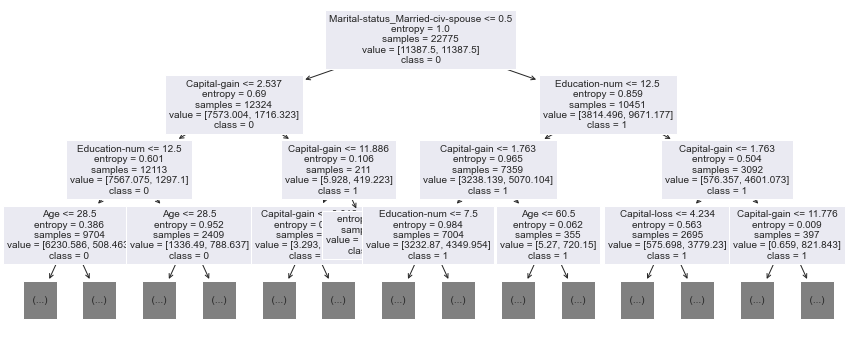

In [83]:
fn = X_train.columns.values
cn = ['0','1']
plt.figure(figsize = (15,6))
plot_tree(dtc, max_depth = 3, feature_names = fn, class_names = cn, filled = False, fontsize=10)

### 4.3 Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
%%time
params = {'max_features': [None, 'sqrt', 0.33, 0.5],
          'max_depth':[6,8,10,15],
          'criterion':['entropy', 'gini']}

rf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=None, 
                            min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
                            class_weight='balanced', n_jobs=-1)

rf_cv = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv=5) 
rf_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best cv parameters: {}".format(rf_cv.best_params_)) 
print("Best score: {}".format(rf_cv.best_score_))

Best cv parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.33}
Best score: 0.9164070508367719
Wall time: 2min 6s


In [86]:
rfmodel = rf_cv.best_estimator_

# Fit the best algorithm to the data 
rfmodel.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=0.33, n_jobs=-1)

Train score:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     17288
           1       0.68      0.93      0.78      5487

    accuracy                           0.88     22775
   macro avg       0.83      0.89      0.85     22775
weighted avg       0.90      0.88      0.88     22775

Test score:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      7410
           1       0.60      0.82      0.69      2352

    accuracy                           0.83      9762
   macro avg       0.77      0.82      0.79      9762
weighted avg       0.86      0.83      0.83      9762



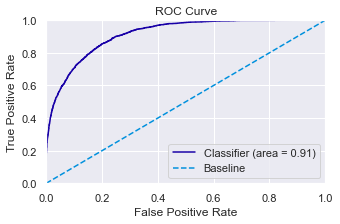

In [87]:
print('Train score:')
classificationreport_train(rfmodel)
print('Test score:')
classificationreport_test(rfmodel)
plotroc(rfmodel)

### 4.4 XGBoost

In [88]:
from xgboost import XGBClassifier

#### With all default parameters of XGBClassifier()

[17:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     17288
           1       0.83      0.73      0.77      5487

    accuracy                           0.90     22775
   macro avg       0.87      0.84      0.85     22775
weighted avg       0.90      0.90      0.90     22775

Test score:
              precision    recall  f1-score   support

           0       0.90      0.94      0.91      7410
           1       0.76      0.65      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.80      0.81      9762
weighted avg       0.86      0.87      0.86      9762



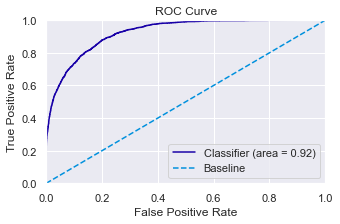

In [89]:
#Train a model using all default parameters in XGBoost
#tree: max_depth (default=6), min_child_weight(default=1), gamma(min_split_loss, default=0), subsample(default=1), colsample_bytree(default=1)
#regularization: lambda (L2, default=1), alpha (L1, default=0)
#learning rate (default=0.3)

xgb0 = XGBClassifier(seed=20)
xgb0.fit(X_train, y_train)
print('Train score:')
classificationreport_train(xgb0)
print('Test score:')
classificationreport_test(xgb0)
plotroc(xgb0)

#### With hyperparameters tuning

In [90]:
#tree: max_depth (default=6), min_child_weight(default=1), gamma(min_split_loss, default=0), subsample(default=1), colsample_bytree(default=1)
#regularization: lambda (L2, default=1), alpha (L1, default=0)
#learning rate (default=0.3)
#scale_pos_weight - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances). 

params = {'n_estimators': [100,200],
          'max_depth': [6,10],
          'subsample': [0.5,0.8,1],
          'colsample_bytree': [0.5,0.8,1],
          'learning_rate': [0.1,0.3]}

xgb = XGBClassifier(min_child_weight=1, gamma=0, reg_alpha=0, reg_lambda=1, objective='binary:logistic', scale_pos_weight=1, seed=20)

xgb_cv = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', cv=5) 
xgb_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best cv parameters: {}".format(xgb_cv.best_params_)) 
print("Best score: {}".format(xgb_cv.best_score_))

[17:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [91]:
xgbmodel = xgb_cv.best_estimator_

# Fit the best algorithm to the data 
xgbmodel.fit(X_train,y_train)

[17:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=20, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Train score:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17288
           1       0.81      0.70      0.75      5487

    accuracy                           0.89     22775
   macro avg       0.86      0.82      0.84     22775
weighted avg       0.88      0.89      0.88     22775

Test score:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.78      0.65      0.71      2352

    accuracy                           0.87      9762
   macro avg       0.84      0.80      0.81      9762
weighted avg       0.87      0.87      0.87      9762



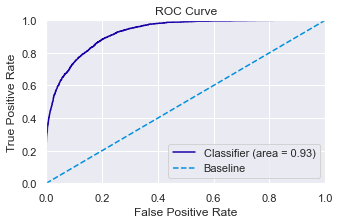

In [92]:
print('Train score:')
classificationreport_train(xgbmodel)
print('Test score:')
classificationreport_test(xgbmodel)
plotroc(xgbmodel)

### 4.5 Light GBM

In [93]:
from lightgbm import LGBMClassifier

#### With all default parameters of LGBMClassifier()

Train score:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17288
           1       0.81      0.70      0.75      5487

    accuracy                           0.89     22775
   macro avg       0.86      0.82      0.84     22775
weighted avg       0.88      0.89      0.88     22775

Test score:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.77      0.65      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



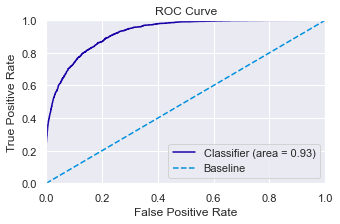

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 3,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [94]:
# Train a model using all default parameters in LGBMclassifier
lgb0 = LGBMClassifier(random_state=3)
lgb0.fit(X_train, y_train)
print('Train score:')
classificationreport_train(lgb0)
print('Test score:')
classificationreport_test(lgb0)
plotroc(lgb0)
lgb0.get_params()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
Train score:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17288
           1       0.80      0.69      0.74      5487

    accuracy                           0.88     22775
   macro avg       0.85      0.82      0.83     22775
weighted avg       0.88      0.88      0.88     22775

Test score:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.77      0.65      0.71      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762

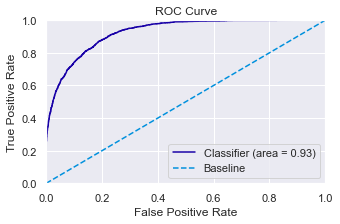

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 50,
 'objective': 'binary',
 'random_state': 3,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'min_data_in_leaf': 100,
 'max_bin': 255,
 'lambda_l1': 0,
 'lambda_l2': 0}

In [95]:
# Train a model using other parameters

lgb1 = LGBMClassifier(max_depth=6, min_data_in_leaf=100, n_estimators=500, learning_rate=0.05, 
                      num_leaves=50, objective='binary', max_bin=255, lambda_l1=0, lambda_l2=0, random_state=3)
lgb1.fit(X_train, y_train)
print('Train score:')
classificationreport_train(lgb1)
print('Test score:')
classificationreport_test(lgb1)
plotroc(lgb1)
lgb1.get_params()

#### With hyperparameters tuning

In [96]:
params = {'max_depth': [6,8,10],
         'min_data_in_leaf': [100,500,1000],
          'feature_fraction': [0.5,0.8,1],
         'n_estimators':[50,100,200],
         'learning_rate': [0.1,0.2,0.3]}

lgbm = LGBMClassifier(num_leaves=600, objective='binary', max_bin=255, lambda_l1=0, lambda_l2=0)
lgbm_cv = GridSearchCV(estimator=lgbm, param_grid=params, scoring='roc_auc', cv=5)
#lgbm_cv = RandomizedSearchCV(estimator=lgbm, param_distributions=params, scoring='roc_auc', cv=5, n_iter=50, n_jobs=-1, random_state=3) 
lgbm_cv.fit(X_train, y_train)

# Print the best parameters and score
print("Best cv parameters: {}".format(lgbm_cv.best_params_)) 
print("Best score: {}".format(lgbm_cv.best_score_))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: f

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: f

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: fea

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value:

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_f

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fra

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_f

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_f

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_f

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_da

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fra

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fract

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_f

In [97]:
lgbmmodel = lgbm_cv.best_estimator_

# Fit the best algorithm to the data 
lgbmmodel.fit(X_train,y_train)

LGBMClassifier(feature_fraction=0.5, lambda_l1=0, lambda_l2=0, max_bin=255,
               max_depth=6, min_data_in_leaf=100, n_estimators=200,
               num_leaves=600, objective='binary')

Train score:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17288
           1       0.80      0.67      0.73      5487

    accuracy                           0.88     22775
   macro avg       0.85      0.81      0.83     22775
weighted avg       0.88      0.88      0.88     22775

Test score:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7410
           1       0.78      0.65      0.71      2352

    accuracy                           0.87      9762
   macro avg       0.84      0.79      0.81      9762
weighted avg       0.87      0.87      0.87      9762



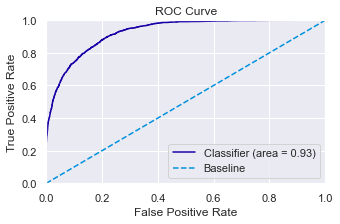

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'num_leaves': 600,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'max_bin': 255,
 'lambda_l1': 0,
 'lambda_l2': 0,
 'feature_fraction': 0.5,
 'min_data_in_leaf': 100}

In [98]:
print('Train score:')
classificationreport_train(lgbmmodel)
print('Test score:')
classificationreport_test(lgbmmodel)
plotroc(lgbmmodel)
lgbmmodel.get_params()

## 5. Explainable AI

### 5.1 Permutation Feature Importance

In [99]:
import eli5
from eli5.sklearn import PermutationImportance

In [100]:
base_features = X_train.columns.to_list()
base_features

['Age',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'Hours-per-week',
 'Work-class_Federal-gov',
 'Work-class_Local or State gov',
 'Work-class_Others',
 'Work-class_Private',
 'Work-class_Self-emp-inc',
 'Work-class_Self-emp-not-inc',
 'Marital-status_Divorced',
 'Marital-status_Married-civ-spouse',
 'Marital-status_Never-married',
 'Marital-status_Others',
 'Marital-status_Separated',
 'Occupation_Adm-clerical',
 'Occupation_Craft-repair',
 'Occupation_Exec-managerial',
 'Occupation_Farming-fishing',
 'Occupation_Handlers-cleaners',
 'Occupation_Machine-op-inspct',
 'Occupation_Other-service',
 'Occupation_Others',
 'Occupation_Prof-specialty',
 'Occupation_Protective-serv',
 'Occupation_Sales',
 'Occupation_Tech-support',
 'Occupation_Transport-moving',
 'Relationship_Husband',
 'Relationship_Not-in-family',
 'Relationship_Other-relative',
 'Relationship_Own-child',
 'Relationship_Unmarried',
 'Relationship_Wife',
 'Race_Black',
 'Race_Others',
 'Race_White',
 'Sex_Female',

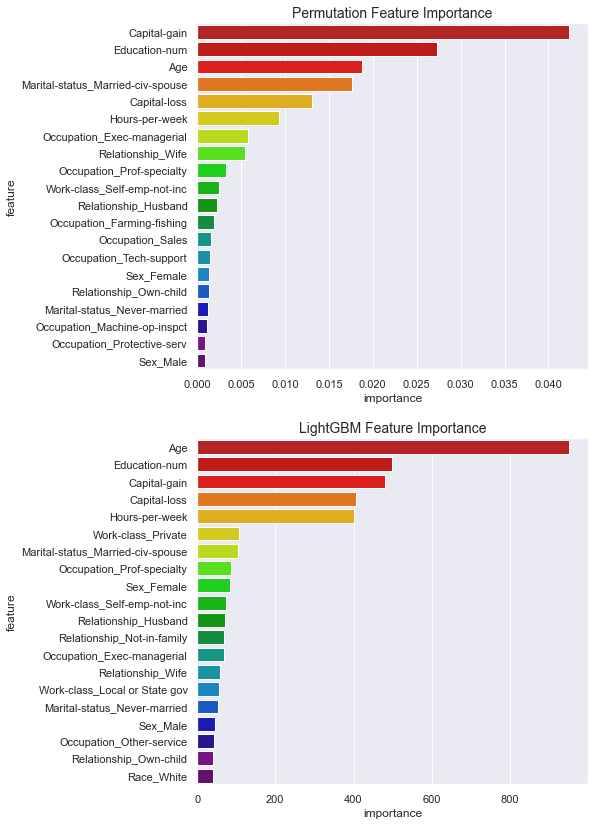

In [101]:
perm = PermutationImportance(lgbmmodel, random_state=1).fit(X_test, y_test)

# Store Permutaion feature importance details in the dataframe for further analysis
perm_df = pd.DataFrame()
perm_df["feature"] = base_features
perm_df["importance"] = perm.feature_importances_

# Store LightGBM feature importance details in the dataframe for further analysis
lgbm_feature_importance_df = pd.DataFrame()
lgbm_feature_importance_df["feature"] = base_features
lgbm_feature_importance_df["importance"] = lgbmmodel.feature_importances_

# plot PFI chart
fig, axes = plt.subplots(2, 1, figsize=(7,14))
plt.rcParams.update({'font.size': 12})

#Permutation Feature Importance
perm_feature_importance_df  = perm_df.sort_values('importance', ascending=False).reset_index()
sns.barplot(x ='importance', y ='feature', data= perm_feature_importance_df[:20], ax=axes[0], palette='nipy_spectral_r')
axes[0].set_title("Permutation Feature Importance", fontsize=14)

#LightGBM Default Feature Importance
#When using a tree-ensemble like random forest you can find out which features the model found valuable by checking the feature importances. 
#In scikit-learn the feature importances are a reflection of how well a feature reduces some criterion like mean squared error for regression problem or gini / entropy for classification problem. 
#This method for calculating feature importance is typically called mean decrease impurity.
feature_importance_df  = lgbm_feature_importance_df.sort_values('importance', ascending=False).reset_index()
sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20], ax=axes[1], palette='nipy_spectral_r')
axes[1].set_title("LightGBM Feature Importance", fontsize=14)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

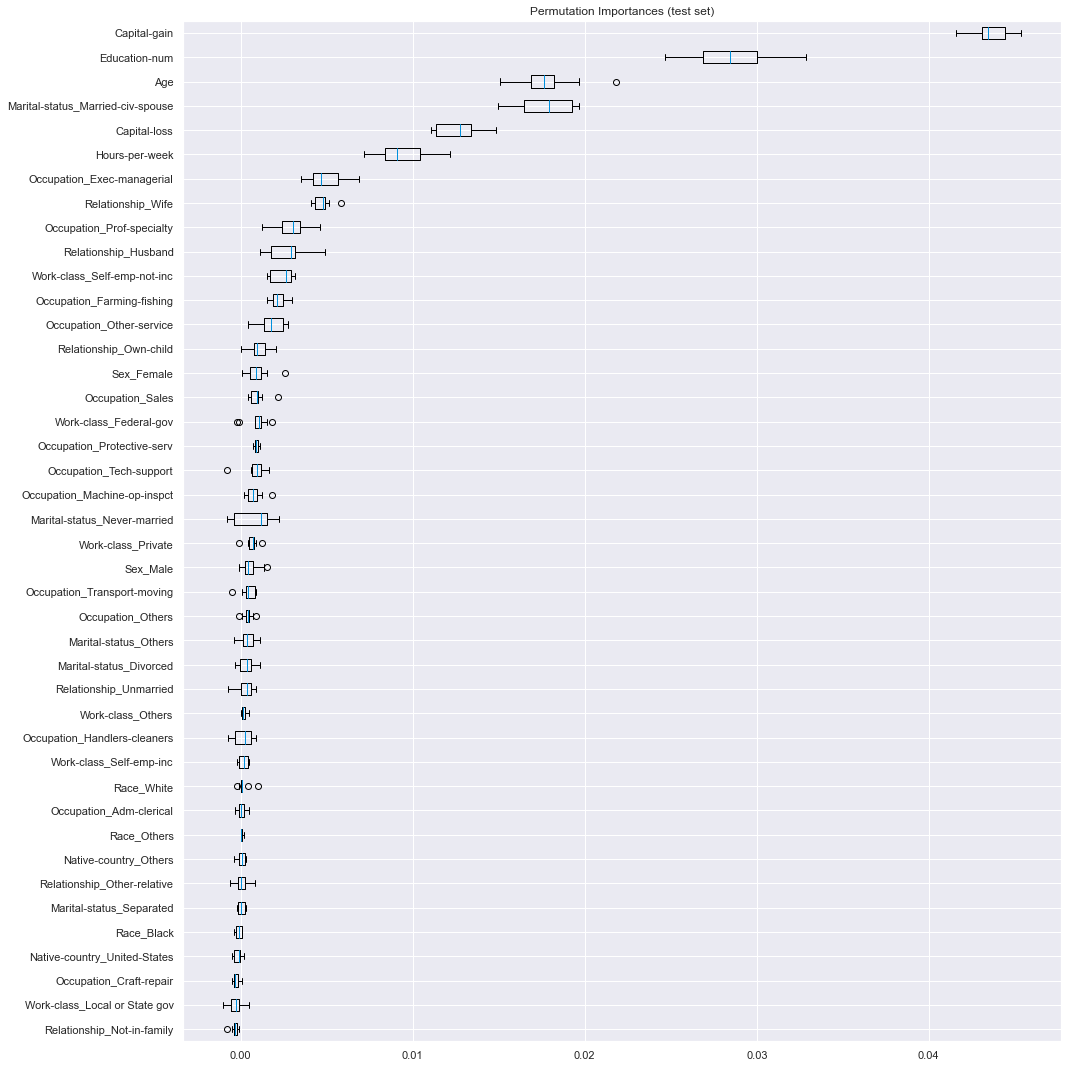

In [102]:
from sklearn.inspection import permutation_importance

plt.rcParams["figure.figsize"] = (15,15)
result = permutation_importance(lgbmmodel, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

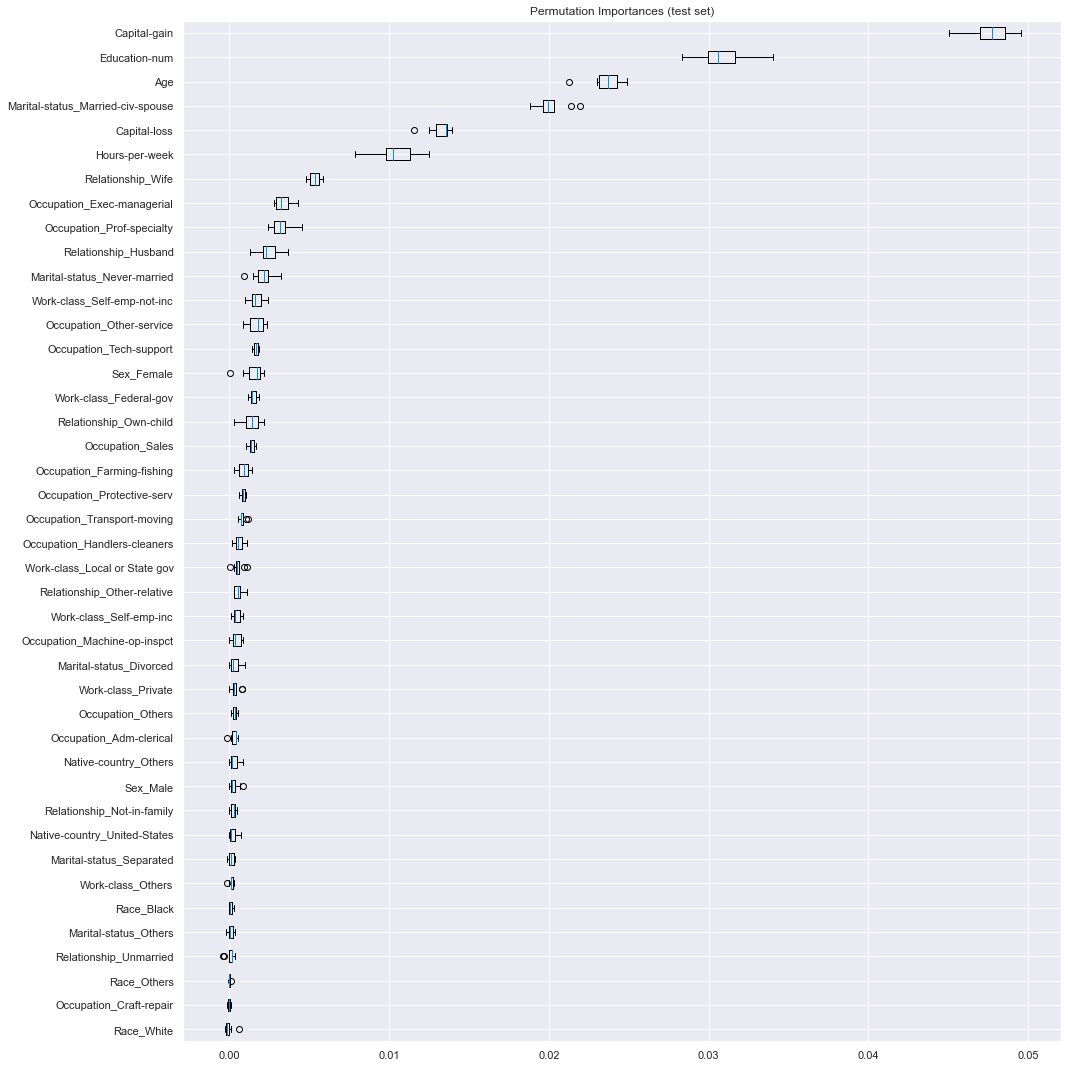

In [103]:
plt.rcParams["figure.figsize"] = (15,15)
result = permutation_importance(lgbmmodel, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

### 5.2 SHAP plots

#### Global explanation

In [104]:
import shap
explainer = shap.TreeExplainer(lgbmmodel, X_test)
shap_values = explainer(X_test)

 99%|===================| 9672/9762 [00:52<00:00]        

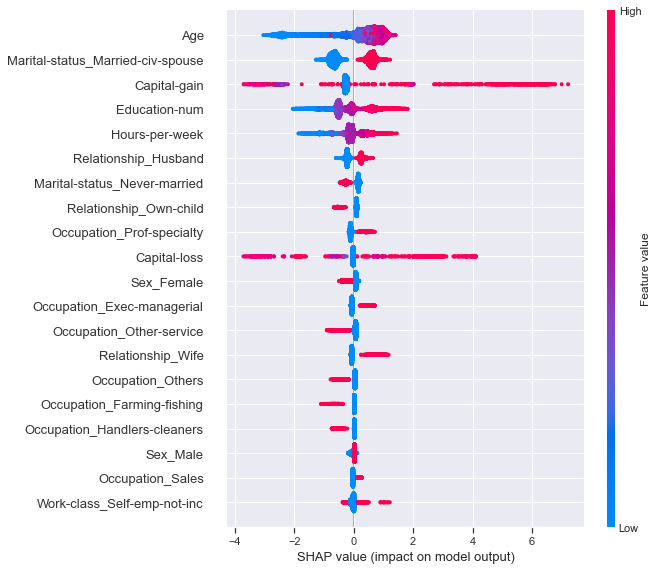

In [105]:
shap.summary_plot(shap_values, X_test, max_display=20, show=False)
plt.gcf().axes[-1].set_aspect(60)
plt.gcf().axes[-1].set_box_aspect(60)

#### Local explanation

In [106]:
y_test[0:20]

6777     0
18150    0
6246     0
20207    0
21381    0
5470     0
8893     0
6061     0
2067     0
27920    0
21587    1
8012     0
4704     1
27661    0
15016    0
31139    1
20866    0
14829    0
25974    0
5526     0
Name: Income, dtype: int64

In [107]:
y_test.iloc[[15]]

31139    1
Name: Income, dtype: int64

In [108]:
X_test.iloc[[15]]

Age  Education-num  Capital-gain  Capital-loss  Hours-per-week  \
31139   27             13     -0.230815      4.367777              55   

       Work-class_Federal-gov  Work-class_Local or State gov  \
31139                       0                              0   

       Work-class_Others  Work-class_Private  Work-class_Self-emp-inc  ...  \
31139                  0                   1                        0  ...   

       Relationship_Own-child  Relationship_Unmarried  Relationship_Wife  \
31139                       0                       0                  0   

       Race_Black  Race_Others  Race_White  Sex_Female  Sex_Male  \
31139           0            0           1           0         1   

       Native-country_Others  Native-country_United-States  
31139                      0                             1  

[1 rows x 42 columns]

In [109]:
# probability of specific data row
lgbmmodel.predict_proba(X_test.iloc[15].values.reshape(1, -1))

array([[0.05147211, 0.94852789]])

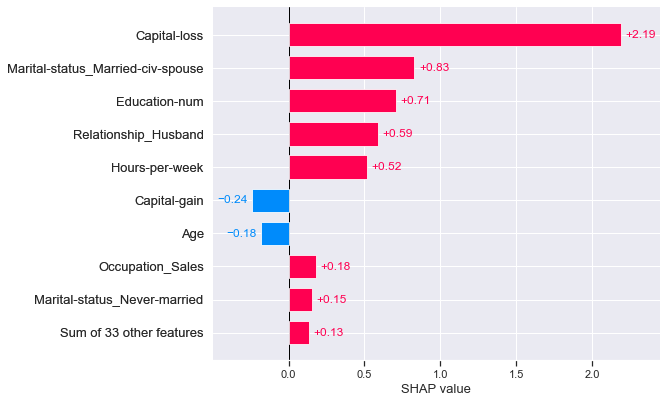

In [110]:
shap.plots.bar(shap_values[15])

In [111]:
X_test.iloc[[16]]

Age  Education-num  Capital-gain  Capital-loss  Hours-per-week  \
20866   27             10     -0.230815     -0.216743              40   

       Work-class_Federal-gov  Work-class_Local or State gov  \
20866                       0                              0   

       Work-class_Others  Work-class_Private  Work-class_Self-emp-inc  ...  \
20866                  0                   1                        0  ...   

       Relationship_Own-child  Relationship_Unmarried  Relationship_Wife  \
20866                       0                       0                  0   

       Race_Black  Race_Others  Race_White  Sex_Female  Sex_Male  \
20866           0            0           1           0         1   

       Native-country_Others  Native-country_United-States  
20866                      0                             1  

[1 rows x 42 columns]

In [112]:
# probability of specific data row
lgbmmodel.predict_proba(X_test.iloc[16].values.reshape(1, -1))

array([[0.97502798, 0.02497202]])

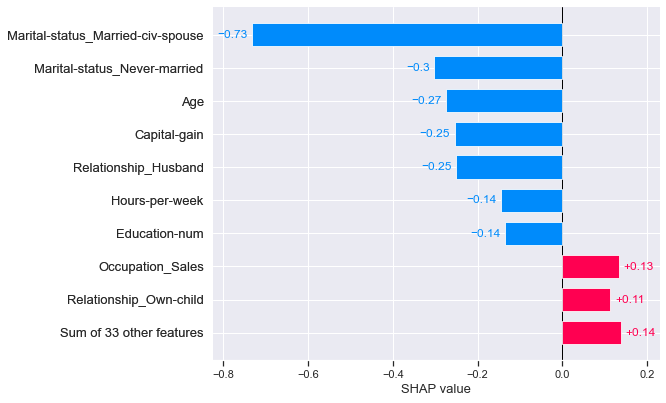

In [113]:
shap.plots.bar(shap_values[16])

### 5.3 Partial Dependence Plots (global explanation)

In [114]:
from sklearn.inspection import PartialDependenceDisplay

In [115]:
# Select the features to display ICE plot
features_pdp = ['Age','Age', 'Education-num', 'Hours-per-week','Capital-gain', 'Capital-loss']

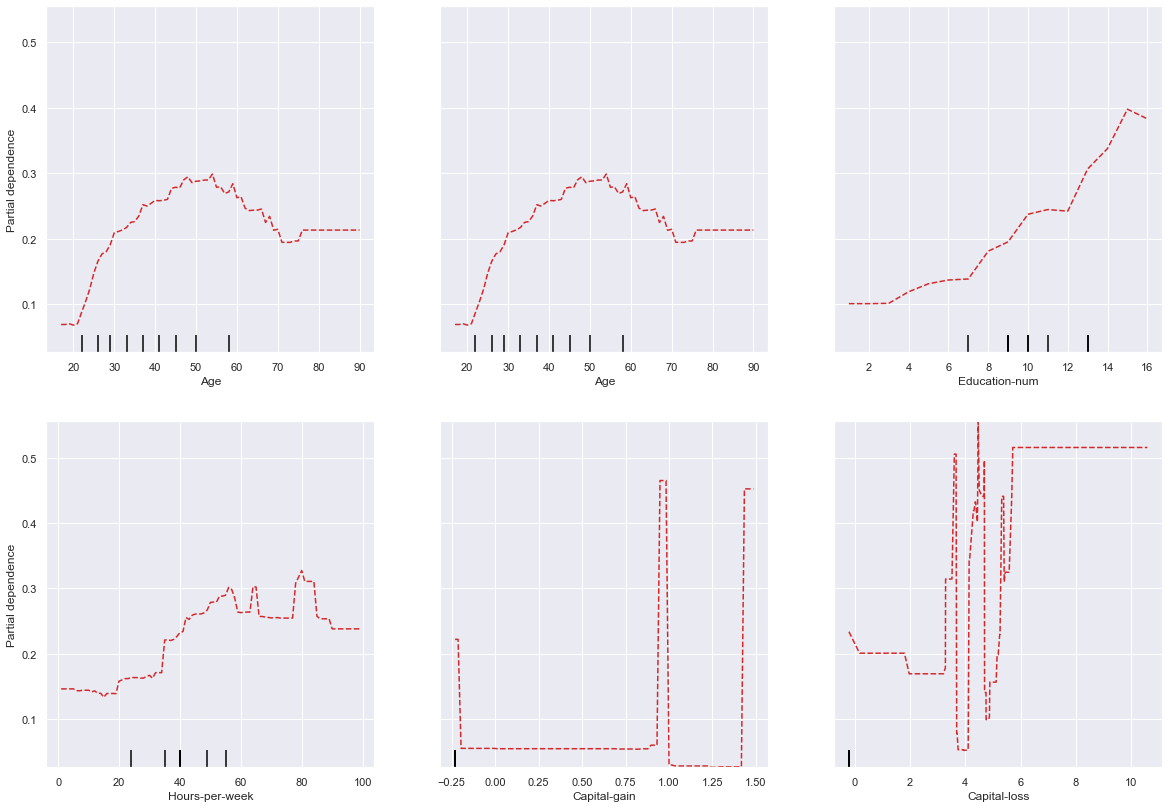

In [116]:
fig, ax = plt.subplots(figsize=(20, 14))
PartialDependenceDisplay.from_estimator(lgbmmodel, X_train, features_pdp, kind='average',
                                        pd_line_kw={"color": "tab:red", "linestyle": "--"}, ax=ax)

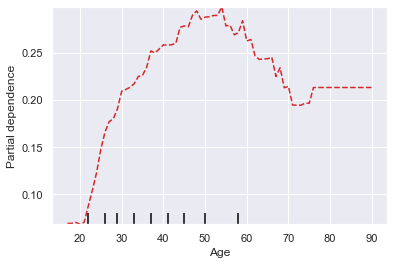

In [117]:
plt.rcParams["figure.figsize"] = (6,4)
PartialDependenceDisplay.from_estimator(lgbmmodel, X_train, ['Age'], kind='average',
                                        pd_line_kw={"color": "tab:red", "linestyle": "--"})

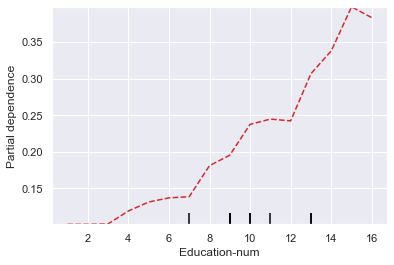

In [118]:
PartialDependenceDisplay.from_estimator(lgbmmodel, X_train, ['Education-num'], kind='average',
                                        pd_line_kw={"color": "tab:red", "linestyle": "--"})

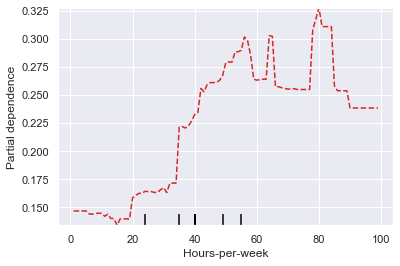

In [119]:
PartialDependenceDisplay.from_estimator(lgbmmodel, X_train, ['Hours-per-week'], kind='average',
                                        pd_line_kw={"color": "tab:red", "linestyle": "--"})

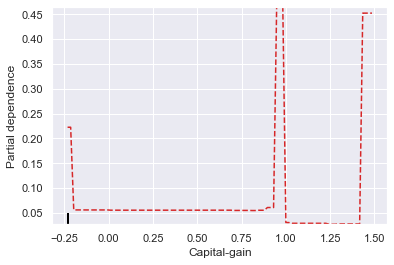

In [120]:
PartialDependenceDisplay.from_estimator(lgbmmodel, X_train, ['Capital-gain'], kind='average',
                                        pd_line_kw={"color": "tab:red", "linestyle": "--"})

### 5.4 Lime plots (local explanation)

In [121]:
import lime
import lime.lime_tabular

In [122]:
y_test.head(20)

6777     0
18150    0
6246     0
20207    0
21381    0
5470     0
8893     0
6061     0
2067     0
27920    0
21587    1
8012     0
4704     1
27661    0
15016    0
31139    1
20866    0
14829    0
25974    0
5526     0
Name: Income, dtype: int64

In [123]:
y_test.loc[[31139]]

31139    1
Name: Income, dtype: int64

In [124]:
X_test.loc[[31139]]

Age  Education-num  Capital-gain  Capital-loss  Hours-per-week  \
31139   27             13     -0.230815      4.367777              55   

       Work-class_Federal-gov  Work-class_Local or State gov  \
31139                       0                              0   

       Work-class_Others  Work-class_Private  Work-class_Self-emp-inc  ...  \
31139                  0                   1                        0  ...   

       Relationship_Own-child  Relationship_Unmarried  Relationship_Wife  \
31139                       0                       0                  0   

       Race_Black  Race_Others  Race_White  Sex_Female  Sex_Male  \
31139           0            0           1           0         1   

       Native-country_Others  Native-country_United-States  
31139                      0                             1  

[1 rows x 42 columns]

In [125]:
predict_fn_lgbm = lambda x: lgbmmodel.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names = X_train.columns, class_names=['Income<=50K', 'Income>50K'])

In [126]:
choosen_instance = X_test.loc[[31139]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_lgbm,num_features=15)
exp.show_in_notebook(show_all=False)

In [127]:
choosen_instance = X_test.loc[[20866]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_lgbm,num_features=15)
exp.show_in_notebook(show_all=False)

In [128]:
# sample ID 20866 (income = 0) - listing out the feature value for reference
X_test.iloc[16]

Age                                  27.000000
Education-num                        10.000000
Capital-gain                         -0.230815
Capital-loss                         -0.216743
Hours-per-week                       40.000000
Work-class_Federal-gov                0.000000
Work-class_Local or State gov         0.000000
Work-class_Others                     0.000000
Work-class_Private                    1.000000
Work-class_Self-emp-inc               0.000000
Work-class_Self-emp-not-inc           0.000000
Marital-status_Divorced               0.000000
Marital-status_Married-civ-spouse     0.000000
Marital-status_Never-married          1.000000
Marital-status_Others                 0.000000
Marital-status_Separated              0.000000
Occupation_Adm-clerical               0.000000
Occupation_Craft-repair               0.000000
Occupation_Exec-managerial            0.000000
Occupation_Farming-fishing            0.000000
Occupation_Handlers-cleaners          0.000000
Occupation_Ma

In [129]:
# sample ID 31139 (income = 1) - listing out the feature value for reference
X_test.iloc[15]

Age                                  27.000000
Education-num                        13.000000
Capital-gain                         -0.230815
Capital-loss                          4.367777
Hours-per-week                       55.000000
Work-class_Federal-gov                0.000000
Work-class_Local or State gov         0.000000
Work-class_Others                     0.000000
Work-class_Private                    1.000000
Work-class_Self-emp-inc               0.000000
Work-class_Self-emp-not-inc           0.000000
Marital-status_Divorced               0.000000
Marital-status_Married-civ-spouse     1.000000
Marital-status_Never-married          0.000000
Marital-status_Others                 0.000000
Marital-status_Separated              0.000000
Occupation_Adm-clerical               0.000000
Occupation_Craft-repair               0.000000
Occupation_Exec-managerial            0.000000
Occupation_Farming-fishing            0.000000
Occupation_Handlers-cleaners          0.000000
Occupation_Ma